In [2]:
library('dplyr')
library(plyr)
library(ggplot2)
library(ImpulseDE2.extended)
#library(BiocParallel)
#register(MulticoreParam(workers = 30))

In [ ]:
# To load all functions
library(Biobase)
#library(BiocParallel)
library(circlize)
import::from(compiler, cmpfun)
library(ComplexHeatmap)
import::from(cowplot, plot_grid)
library(DESeq2)
library(ggplot2)
import::from(grDevices, dev.off, graphics.off, pdf)
library(knitr)
library(Matrix)
library(methods)
import::from(stats, dnbinom, median, optim, p.adjust, pchisq, rnbinom, rnorm, runif, sd, time)
library(SummarizedExperiment)
import::from(utils, packageDescription)
import::from(zoo,as.zoo,rollapply)

sapply(list.files('/home/khrovatin/git/ImpulseDE2_extended/R', full.name=TRUE), source)

In [9]:
server=TRUE
if (server){
    pathSave='/home/khrovatin/timeTrajectoriesNet/data/stages/disagg/impulse/'
    pathCounts='/home/khrovatin/timeTrajectoriesNet/data/counts/'
    pathConditions='/home/khrovatin/timeTrajectoriesNet/data/RPKUM/'
}else{
    pathSave='/home/karin/Documents/timeTrajectories/data/stages/disagg/impulse/'
    pathCounts='/home/karin/Documents/timeTrajectories/data/countsRaw/combined/'
    pathConditions='/home/karin/Documents/timeTrajectories/data/RPKUM/combined/'
}

## Fit models

In [4]:
genes<-read.table(paste(pathCounts,'mergedGenes_counts.tsv',sep=''), header=TRUE,row.names=1, sep="\t")
conditions<-read.table(paste(pathConditions,'conditions_mergedGenes.tsv',sep=''), header=TRUE,row.names='Measurment', sep="\t")
conditions[conditions=='']=NA
#R imported colnames of genes with changes but gene IDs remained ok
rownames(conditions)<-make.names(rownames(conditions))

### WT or AX4
Fit extended models on WT data without batch factors. Model is fitted to time-course of samples.

In [6]:
#Y=conditions[conditions$Group=='WT', 'Time',drop=F]
Y=conditions[conditions$Strain=='AX4', 'Time',drop=F]
Y[,'Sample']=rownames(Y)
Y[,'Condition']='case'

# Retain only times with more than 2 samples - AX4 has some reps 
# that have more time points and can affect model fitting
minNRep=2
sampleCount<-count(Y,'Time')
Y<- Y[Y$Time %in% sampleCount[sampleCount$freq>minNRep,'Time'],]

Y<-Y[order(Y$Time),]
X=genes[,Y$Sample]
print(dim(X))

[1] 12828    74


In [7]:
objectImpulseDE2 <- runImpulseDE2(matCountData = as.matrix(X), dfAnnotation = Y,boolCaseCtrl = FALSE,
                                  vecConfounders = NULL,
                                  boolIdentifyTransients = TRUE,scaNProc = 40, boolExtended=TRUE)

saveRDS(object=objectImpulseDE2,file=paste(pathSave,'AX4_min',minNRep,'Rep.rds',sep=''))

ImpulseDE2 for count data, v1.10.0

# Process input



Processing Details:
ImpulseDE2 runs in case-only mode.
Found time points: 0,1,2,3,4,5,6,8,12,16,20,24
Case: Found the samples at time point 0: FDpool01_TCGCAGG_Hr00_mappedGene_expressions_All_milestone_mRNA_gff,FDpool02_TCGCAGG_Hr00_mappedGene_expressions_All_milestone_mRNA_gff,Ax4_r1_00h_9_S86_L002_R1_001_mappedGene_expressions_All_milestone_mRNA_gff,Ax4_r2_00h_9_S58_L003_R1_001_mappedGene_expressions_All_milestone_mRNA_gff,Pool26_AX4_bio2_hr00_1_TCGCAGG_mappedGene_expressions_All_milestone_mRNA_gff,pool27_AX4_bio1_hr00_1_TCGCAGG_mappedGene_expressions_All_milestone_mRNA_gff,Pool28_AX4_bio2_hr00_1_13_ACTATCA_mappedGene_expressions_All_milestone_mRNA_gff
Case: Found the samples at time point 1: FDpool01_CTCTGCA_Hr01_mappedGene_expressions_All_milestone_mRNA_gff,FDpool02_CTCTGCA_Hr01_mappedGene_expressions_All_milestone_mRNA_gff,Pool26_AX4_bio2_hr01_2_CTCTGCA_mappedGene_expressions_All_milestone_mRNA_gff,pool27_AX4_bio1_hr01_2_CTCTGCA_mappedGene_expressions_All_milestone_mRNA_gff,Pool28

# Run DESeq2: Using dispersion factorscomputed by DESeq2.

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



[1] "Corrected 47 DESEq2 dispersion estimates which to avoid variance overestimation and loss of discriminatory power for model selection."


Consumed time: 0.24 min.

# Compute size factors

# Fitting null and alternative model to the genes

Consumed time: 8.94 min.

# Fitting sigmoid model to case condition

Consumed time: 8.43 min.

# Fitting 3 and 4 sigmoid model to case condition

[1] "ERROR: Fitting four sigmoid model: fitFourSigmoidModel() with optimisation method BFGS from a list of possible optimisation methods BFGS, Nelder-Mead, SANN. Wrote report into ImpulseDE2_lsErrorCausingGene.RData"
[1] "vecParamGuess 1, 6.24768300661654, 5.0191915923913, 7.24025994277226, 6.95761139394672, 6.09645904291899, 18.2753040231764, 6.38015278615057, 1.68688195757568, 10.4584152046591"
[1] "vecCounts 349, 70, 54, 72, 40, 29, 192, 298, 101, 15, 23, 203, 442, 191, 32, 70, 214, 530, 186, 30, 50, 348, 603, 197, 182, 209, 62, 58, 151, 511, 292, 48, 40, 248, 444, 917, 42, 50, 241, 810, 201, 147, 147, 68, 40, 541, 996, 382, 236, 268, 54, 33, 421, 675, 516, 276, 225, 34, 122, 587, 389, 136, 199, 187, 43, 79, 743, 512, 200, 202, 149, 224, 18

[1] "ERROR: Fitting three sigmoid model: fitThreeSigmoidModel() with optimisation methodBFGSfrom a list of possible optimisation methods BFGS, Nelder-Mead, SANN.Wrote report into ImpulseDE2_lsErrorCausingGene.RData"
[1] "vecParamGuess 1, 3.84898058008438, 4.55173045181165, 5.46151476611017, 4.53194651060149, 5.29810221679509, 6.82202571630478, 12.0507889855653"
[1] "vecCounts 44, 57, 53, 38, 103, 152, 161, 30, 107, 65, 128, 80, 85, 173, 165, 161, 104, 78, 134, 114, 266, 88, 52, 102, 166, 89, 152, 181, 85, 36, 80, 164, 258, 61, 70, 14, 106, 119, 44, 47, 24, 39, 26, 42, 34, 12, 15, 21, 32, 12, 19, 33, 18, 13, 12, 9, 32, 7, 21, 20, 170, 165, 151, 44, 110, 108, 57, 66, 102, 72, 24, 42, 86, 74"
[1] "scaDisp 4.22112485228182"
[1] "vecSizeFactors 0.822267674536784, 0.706293674617082, 0.793859671110088, 0.969176704709969, 1.05529810101242, 1.17993498787958, 2.40562417852263, 0.467282553125588, 0.551683091421595, 0.451220943601815, 0.903673297380816, 1.813068416574, 0.669182642945877, 0.7741598

[1] "ERROR: Fitting three sigmoid model: fitThreeSigmoidModel() with optimisation methodBFGSfrom a list of possible optimisation methods BFGS, Nelder-Mead, SANN.Wrote report into ImpulseDE2_lsErrorCausingGene.RData"
[1] "vecParamGuess 1, 3.69088606581337, 3.65611420950935, 5.38463525924552, 5.28478679117531, 10.2735286764801, 13.3247699998319, 14.4092801827937"
[1] "vecCounts 126, 132, 169, 209, 204, 292, 424, 31, 44, 66, 117, 138, 58, 134, 185, 126, 301, 119, 263, 191, 356, 336, 143, 114, 517, 250, 149, 173, 141, 92, 70, 138, 228, 87, 63, 54, 129, 114, 89, 79, 71, 188, 121, 124, 119, 73, 87, 66, 107, 90, 71, 145, 20, 62, 78, 62, 36, 13, 22, 34, 13, 58, 63, 67, 30, 39, 35, 42, 56, 143, 60, 23, 42, 46"
[1] "scaDisp 6.91108680627076"
[1] "vecSizeFactors 0.822267674536784, 0.706293674617082, 0.793859671110088, 0.969176704709969, 1.05529810101242, 1.17993498787958, 2.40562417852263, 0.467282553125588, 0.551683091421595, 0.451220943601815, 0.903673297380816, 1.813068416574, 0.66918264294587

[1] "ERROR: Fitting three sigmoid model: fitThreeSigmoidModel() with optimisation methodBFGSfrom a list of possible optimisation methods BFGS, Nelder-Mead, SANN.Wrote report into ImpulseDE2_lsErrorCausingGene.RData"
[1] "vecParamGuess 1, 5.15824388842533, 5.14603729362164, 6.15088263883388, 6.24896439011602, 14.9123806245625, 19.5640590190887, 0.509533206000924"
[1] "vecCounts 190, 219, 434, 458, 306, 318, 597, 70, 188, 137, 222, 316, 128, 204, 254, 310, 445, 113, 246, 271, 374, 416, 122, 280, 615, 305, 330, 398, 277, 136, 166, 365, 523, 238, 170, 153, 295, 310, 298, 162, 141, 249, 153, 183, 207, 199, 120, 139, 189, 131, 111, 146, 100, 128, 135, 152, 99, 42, 95, 169, 121, 143, 316, 245, 137, 133, 201, 237, 296, 311, 104, 159, 185, 240"
[1] "scaDisp 13.3867108257128"
[1] "vecSizeFactors 0.822267674536784, 0.706293674617082, 0.793859671110088, 0.969176704709969, 1.05529810101242, 1.17993498787958, 2.40562417852263, 0.467282553125588, 0.551683091421595, 0.451220943601815, 0.90367329738081

[1] "ERROR: Fitting four sigmoid model: fitFourSigmoidModel() with optimisation method BFGS from a list of possible optimisation methods BFGS, Nelder-Mead, SANN. Wrote report into ImpulseDE2_lsErrorCausingGene.RData"
[1] "vecParamGuess 1, 7.59673853651255, 7.74401212384933, 7.97149376153238, 7.06931181581027, 7.9802514912095, 2.30942258052528, 14.0888553801924, 11.8135253805667, 4.64093480072916"
[1] "vecCounts 225, 150, 180, 285, 430, 123, 1198, 707, 399, 294, 317, 2506, 593, 425, 371, 488, 2049, 712, 542, 393, 177, 2268, 710, 522, 1171, 1022, 518, 540, 1404, 627, 823, 715, 318, 2554, 783, 744, 861, 838, 2642, 1652, 329, 1617, 1414, 808, 662, 2203, 1798, 1012, 1390, 1492, 728, 260, 1752, 1406, 1211, 2048, 1260, 296, 875, 2231, 2483, 1134, 3570, 2326, 1103, 1109, 2374, 2113, 1001, 2265, 1274, 945, 1545, 2608"
[1] "scaDisp 5.01227696899238"
[1] "vecSizeFactors 0.822267674536784, 0.706293674617082, 0.793859671110088, 0.969176704709969, 1.05529810101242, 1.17993498787958, 2.40562417852263

[1] "ERROR: Fitting three sigmoid model: fitThreeSigmoidModel() with optimisation methodBFGSfrom a list of possible optimisation methods BFGS, Nelder-Mead, SANN.Wrote report into ImpulseDE2_lsErrorCausingGene.RData"
[1] "vecParamGuess 1, 6.25893176417626, 6.05282240132412, 7.10656180173791, 7.15330661336139, 21.4092437345535, 21.9527172446251, 15.5305646862835"
[1] "vecCounts 369, 360, 623, 620, 682, 494, 1144, 175, 431, 350, 487, 1029, 296, 420, 676, 659, 1153, 308, 571, 550, 574, 1260, 305, 520, 1077, 711, 669, 799, 761, 250, 585, 995, 873, 1380, 508, 514, 1313, 1166, 1780, 1265, 440, 1645, 1127, 1219, 1322, 1466, 1083, 1393, 1563, 1122, 1047, 768, 1251, 1446, 1113, 1007, 732, 366, 1156, 1288, 955, 827, 772, 657, 937, 876, 877, 503, 681, 830, 385, 493, 746, 1022"
[1] "scaDisp 20.0404201338739"
[1] "vecSizeFactors 0.822267674536784, 0.706293674617082, 0.793859671110088, 0.969176704709969, 1.05529810101242, 1.17993498787958, 2.40562417852263, 0.467282553125588, 0.551683091421595, 0.451

[1] "ERROR: Fitting four sigmoid model: fitFourSigmoidModel() with optimisation method BFGS from a list of possible optimisation methods BFGS, Nelder-Mead, SANN. Wrote report into ImpulseDE2_lsErrorCausingGene.RData"
[1] "vecParamGuess 1, 5.75099853988345, 4.64731564412313, 5.39147116175281, 4.85358293759699, 6.2586120784653, 3.54637517407537, 4.48475413955748, 11.8486908450723, 4.5927838627249"
[1] "vecCounts 158, 52, 28, 68, 44, 54, 242, 137, 124, 48, 42, 415, 343, 224, 52, 79, 305, 389, 200, 33, 47, 311, 316, 149, 147, 194, 39, 44, 118, 233, 135, 58, 35, 127, 176, 184, 35, 46, 126, 181, 90, 44, 90, 53, 24, 224, 282, 126, 74, 150, 26, 24, 191, 145, 124, 56, 50, 14, 36, 329, 122, 62, 172, 128, 33, 51, 436, 176, 76, 68, 29, 78, 71, 423"
[1] "scaDisp 1.80214256947313"
[1] "vecSizeFactors 0.822267674536784, 0.706293674617082, 0.793859671110088, 0.969176704709969, 1.05529810101242, 1.17993498787958, 2.40562417852263, 0.467282553125588, 0.551683091421595, 0.451220943601815, 0.9036732973808

[1] "ERROR: Fitting four sigmoid model: fitFourSigmoidModel() with optimisation method BFGS from a list of possible optimisation methods BFGS, Nelder-Mead, SANN. Wrote report into ImpulseDE2_lsErrorCausingGene.RData"
[1] "vecParamGuess 1, 5.89240266956344, 5.22621488437458, 6.08002430313099, 5.28994040308437, 4.69335773145976, 13.9166102036834, 1.76459455490112, 2.15771545283496, 8.01881364360452"
[1] "vecCounts 48, 86, 32, 54, 31, 26, 158, 9, 2, 6, 4, 32, 67, 81, 8, 21, 230, 66, 80, 21, 13, 159, 47, 29, 86, 85, 19, 19, 29, 6, 24, 15, 4, 16, 11, 33, 17, 29, 56, 34, 47, 40, 29, 45, 76, 127, 743, 598, 351, 519, 192, 131, 561, 656, 521, 513, 362, 58, 293, 704, 332, 76, 217, 150, 129, 152, 391, 317, 84, 71, 56, 81, 158, 495"
[1] "scaDisp 3.16121452194582"
[1] "vecSizeFactors 0.822267674536784, 0.706293674617082, 0.793859671110088, 0.969176704709969, 1.05529810101242, 1.17993498787958, 2.40562417852263, 0.467282553125588, 0.551683091421595, 0.451220943601815, 0.903673297380816, 1.8130684165

[1] "ERROR: Fitting four sigmoid model: fitFourSigmoidModel() with optimisation method BFGS from a list of possible optimisation methods BFGS, Nelder-Mead, SANN. Wrote report into ImpulseDE2_lsErrorCausingGene.RData"
[1] "vecParamGuess 1, 7.0951217973494, 6.05269747711358, 7.07154422996674, 6.97705591194295, 7.22400384891631, 1.03351752273738, 3.10620632953942, 17.8520836047828, 18.5988870877773"
[1] "vecCounts 244, 94, 88, 101, 242, 133, 856, 115, 100, 82, 75, 469, 263, 190, 126, 204, 468, 277, 222, 155, 134, 587, 311, 203, 226, 171, 164, 195, 297, 282, 227, 182, 103, 770, 180, 492, 453, 353, 1825, 797, 305, 458, 485, 801, 474, 2584, 1303, 531, 483, 584, 432, 191, 1438, 643, 657, 1034, 709, 235, 559, 1945, 752, 328, 1164, 922, 615, 659, 1889, 1398, 329, 545, 275, 560, 915, 1329"
[1] "scaDisp 4.1216114911076"
[1] "vecSizeFactors 0.822267674536784, 0.706293674617082, 0.793859671110088, 0.969176704709969, 1.05529810101242, 1.17993498787958, 2.40562417852263, 0.467282553125588, 0.55168309

[1] "ERROR: Fitting three sigmoid model: fitThreeSigmoidModel() with optimisation methodBFGSfrom a list of possible optimisation methods BFGS, Nelder-Mead, SANN.Wrote report into ImpulseDE2_lsErrorCausingGene.RData"
[1] "vecParamGuess 1, 8.05179656326434, 9.02584685539745, 10.2120753766748, 9.67692508152174, 4.1206166446209, 9.9864564333111, 12.3611625116318"
[1] "vecCounts 24, 3, 13, 18, 16, 16, 30, 4, 7, 9, 26, 40, 57, 30, 52, 56, 33, 60, 46, 100, 55, 28, 8, 71, 21, 31, 3, 16, 9, 8, 19, 3, 7, 3, 8, 10, 6, 9, 42, 32, 11, 37, 52, 22, 51, 24, 352, 656, 734, 647, 266, 815, 1516, 750, 777, 1628, 2380, 393, 1610, 2414, 1199, 2578, 5113, 9824, 2874, 2580, 5027, 23889, 22313, 23967, 11587, 10855, 7783, 9023"
[1] "scaDisp 2.72829379108233"
[1] "vecSizeFactors 0.822267674536784, 0.706293674617082, 0.793859671110088, 0.969176704709969, 1.05529810101242, 1.17993498787958, 2.40562417852263, 0.467282553125588, 0.551683091421595, 0.451220943601815, 0.903673297380816, 1.813068416574, 0.6691826429458

[1] "ERROR: Fitting four sigmoid model: fitFourSigmoidModel() with optimisation method BFGS from a list of possible optimisation methods BFGS, Nelder-Mead, SANN. Wrote report into ImpulseDE2_lsErrorCausingGene.RData"
[1] "vecParamGuess 1, 3.65592946354267, 5.48743593233405, 5.49501958166085, 3.7149791334388, 4.77489073171707, 12.0359073970467, 5.0112589225173, 20.366935774684, 21.9141241014004"
[1] "vecCounts 84, 172, 263, 143, 148, 189, 226, 34, 160, 62, 158, 165, 56, 101, 80, 85, 138, 63, 97, 72, 192, 182, 53, 134, 267, 95, 83, 118, 129, 42, 169, 100, 236, 156, 68, 85, 133, 114, 133, 84, 84, 230, 63, 69, 110, 91, 55, 47, 113, 46, 35, 59, 11, 44, 20, 44, 13, 5, 18, 17, 9, 11, 26, 24, 13, 11, 5, 11, 21, 45, 11, 7, 14, 10"
[1] "scaDisp 5.54133735384764"
[1] "vecSizeFactors 0.822267674536784, 0.706293674617082, 0.793859671110088, 0.969176704709969, 1.05529810101242, 1.17993498787958, 2.40562417852263, 0.467282553125588, 0.551683091421595, 0.451220943601815, 0.903673297380816, 1.813068416

[1] "ERROR: Fitting three sigmoid model: fitThreeSigmoidModel() with optimisation methodBFGSfrom a list of possible optimisation methods BFGS, Nelder-Mead, SANN.Wrote report into ImpulseDE2_lsErrorCausingGene.RData"
[1] "vecParamGuess 1, 4.97978804480068, 4.96851275683854, 5.34345920030074, 4.22090028959088, 16.99990160577, 14.0251018032432, 3.71210788562894"
[1] "vecCounts 105, 98, 98, 132, 127, 128, 267, 33, 37, 40, 84, 149, 43, 63, 96, 100, 190, 71, 103, 131, 206, 228, 84, 82, 382, 257, 125, 151, 106, 41, 61, 146, 203, 99, 49, 41, 134, 128, 59, 45, 58, 147, 114, 80, 86, 57, 80, 100, 216, 151, 75, 147, 118, 97, 93, 154, 150, 29, 86, 180, 69, 55, 100, 83, 62, 61, 108, 93, 94, 258, 140, 69, 120, 218"
[1] "scaDisp 11.0734022037218"
[1] "vecSizeFactors 0.822267674536784, 0.706293674617082, 0.793859671110088, 0.969176704709969, 1.05529810101242, 1.17993498787958, 2.40562417852263, 0.467282553125588, 0.551683091421595, 0.451220943601815, 0.903673297380816, 1.813068416574, 0.669182642945877

[1] "ERROR: Fitting three sigmoid model: fitThreeSigmoidModel() with optimisation methodBFGSfrom a list of possible optimisation methods BFGS, Nelder-Mead, SANN.Wrote report into ImpulseDE2_lsErrorCausingGene.RData"
[1] "vecParamGuess 1, 8.0899294006259, 6.40331900455531, 7.4662770538854, 6.89289025358472, 11.5032854899764, 7.02915962040424, 5.73633084073663"
[1] "vecCounts 6, 9, 24, 12, 16, 31, 14, 22, 47, 63, 250, 101, 34, 59, 82, 156, 126, 43, 39, 44, 187, 79, 23, 67, 50, 28, 61, 99, 93, 8, 125, 157, 534, 551, 57, 94, 244, 318, 392, 352, 263, 682, 414, 507, 872, 469, 441, 702, 963, 386, 381, 327, 42, 196, 185, 78, 43, 26, 55, 124, 136, 1054, 1266, 1289, 652, 705, 810, 2294, 3452, 1549, 280, 858, 1193, 701"
[1] "scaDisp 2.72509351937549"
[1] "vecSizeFactors 0.822267674536784, 0.706293674617082, 0.793859671110088, 0.969176704709969, 1.05529810101242, 1.17993498787958, 2.40562417852263, 0.467282553125588, 0.551683091421595, 0.451220943601815, 0.903673297380816, 1.813068416574, 0.669182

[1] "ERROR: Fitting three sigmoid model: fitThreeSigmoidModel() with optimisation methodBFGSfrom a list of possible optimisation methods BFGS, Nelder-Mead, SANN.Wrote report into ImpulseDE2_lsErrorCausingGene.RData"
[1] "vecParamGuess 1, 5.96285706516349, 4.91032317473824, 6.31131040090367, 6.14519829561558, 2.99902286566794, 11.5228609610349, 12.0248895697296"
[1] "vecCounts 346, 167, 129, 182, 356, 146, 763, 380, 268, 238, 112, 908, 241, 231, 167, 210, 742, 218, 246, 163, 50, 488, 218, 122, 307, 307, 138, 122, 161, 147, 59, 173, 29, 155, 84, 73, 249, 124, 151, 155, 109, 127, 100, 263, 161, 152, 255, 147, 127, 174, 160, 54, 384, 339, 352, 303, 193, 76, 222, 253, 62, 59, 124, 139, 81, 75, 112, 103, 99, 161, 117, 73, 75, 121"
[1] "scaDisp 4.9246231629909"
[1] "vecSizeFactors 0.822267674536784, 0.706293674617082, 0.793859671110088, 0.969176704709969, 1.05529810101242, 1.17993498787958, 2.40562417852263, 0.467282553125588, 0.551683091421595, 0.451220943601815, 0.903673297380816, 1.8130684

[1] "ERROR: Fitting four sigmoid model: fitFourSigmoidModel() with optimisation method BFGS from a list of possible optimisation methods BFGS, Nelder-Mead, SANN. Wrote report into ImpulseDE2_lsErrorCausingGene.RData"
[1] "vecParamGuess 1, 5.58551898171225, 4.19355328560112, 5.28787780159668, 4.05786486255022, 4.7783985202514, 0.390711966902018, 15.2193001024425, 20.8857893943787, 10.7447676211596"
[1] "vecCounts 99, 83, 109, 157, 153, 135, 280, 40, 48, 36, 74, 140, 37, 55, 59, 85, 181, 51, 100, 89, 118, 191, 83, 91, 220, 164, 103, 108, 170, 50, 101, 129, 228, 317, 62, 64, 235, 255, 429, 264, 107, 400, 333, 266, 298, 425, 220, 221, 283, 216, 144, 149, 169, 180, 149, 173, 103, 44, 124, 195, 63, 59, 115, 109, 74, 83, 83, 80, 75, 143, 95, 61, 104, 96"
[1] "scaDisp 23.7855475034748"
[1] "vecSizeFactors 0.822267674536784, 0.706293674617082, 0.793859671110088, 0.969176704709969, 1.05529810101242, 1.17993498787958, 2.40562417852263, 0.467282553125588, 0.551683091421595, 0.451220943601815, 0.90

[1] "ERROR: Fitting three sigmoid model: fitThreeSigmoidModel() with optimisation methodBFGSfrom a list of possible optimisation methods BFGS, Nelder-Mead, SANN.Wrote report into ImpulseDE2_lsErrorCausingGene.RData"
[1] "vecParamGuess 1, 0.806712158074636, 0.163149769406997, 4.20063167631792, 4.2423744771722, 6.7392574287951, 10.2634489014745, 18.5520821996033"
[1] "vecCounts 26, 19, 29, 39, 42, 63, 61, 9, 14, 14, 40, 46, 21, 14, 19, 22, 35, 9, 23, 36, 42, 55, 21, 16, 36, 6, 25, 40, 32, 18, 13, 40, 80, 112, 23, 3, 57, 75, 99, 66, 23, 39, 26, 59, 51, 89, 54, 48, 35, 19, 29, 53, 33, 41, 30, 7, 9, 17, 32, 59, 11, 15, 11, 18, 17, 24, 22, 16, 12, 16, 0, 11, 30, 19"
[1] "scaDisp 5.73691880987801"
[1] "vecSizeFactors 0.822267674536784, 0.706293674617082, 0.793859671110088, 0.969176704709969, 1.05529810101242, 1.17993498787958, 2.40562417852263, 0.467282553125588, 0.551683091421595, 0.451220943601815, 0.903673297380816, 1.813068416574, 0.669182642945877, 0.774159898975452, 0.820352585800941, 1

[1] "ERROR: Fitting three sigmoid model: fitThreeSigmoidModel() with optimisation methodBFGSfrom a list of possible optimisation methods BFGS, Nelder-Mead, SANN.Wrote report into ImpulseDE2_lsErrorCausingGene.RData"
[1] "vecParamGuess 1, 4.77747947720547, 7.08217527207746, 8.56910066476781, 8.56424036045786, 7.21826730296016, 7.34916826710105, 11.3314703777432"
[1] "vecCounts 589, 404, 419, 710, 550, 139, 1677, 567, 796, 347, 309, 1982, 995, 865, 700, 895, 2109, 1101, 1395, 647, 523, 2366, 1167, 2018, 1873, 1737, 1063, 1249, 2118, 1368, 2570, 1169, 837, 3405, 1512, 3933, 1623, 1523, 4303, 3639, 1216, 3553, 3783, 1987, 1825, 5815, 4087, 2606, 2768, 3879, 2271, 765, 3476, 3558, 2459, 3440, 2959, 370, 1348, 3939, 1233, 820, 2104, 2111, 900, 1191, 2854, 1444, 1017, 2270, 1316, 941, 1692, 3086"
[1] "scaDisp 5.30111089173396"
[1] "vecSizeFactors 0.822267674536784, 0.706293674617082, 0.793859671110088, 0.969176704709969, 1.05529810101242, 1.17993498787958, 2.40562417852263, 0.467282553125588,

[1] "ERROR: Fitting four sigmoid model: fitFourSigmoidModel() with optimisation method BFGS from a list of possible optimisation methods BFGS, Nelder-Mead, SANN. Wrote report into ImpulseDE2_lsErrorCausingGene.RData"
[1] "vecParamGuess 1, 5.03597571223533, 5.36461290368866, 5.29856227615664, 4.28686665409283, 5.69946924085666, 21.6752807311714, 5.96016386523843, 13.7535722795874, 8.50515162572265"
[1] "vecCounts 138, 268, 547, 303, 213, 343, 381, 35, 165, 38, 113, 132, 66, 120, 113, 116, 189, 74, 195, 97, 202, 184, 116, 153, 516, 197, 135, 151, 114, 72, 102, 130, 208, 94, 66, 49, 95, 103, 79, 107, 113, 194, 120, 71, 116, 73, 143, 116, 190, 104, 76, 172, 114, 265, 234, 191, 100, 39, 153, 136, 183, 206, 116, 87, 73, 81, 98, 85, 124, 183, 96, 30, 73, 57"
[1] "scaDisp 6.24290948198389"
[1] "vecSizeFactors 0.822267674536784, 0.706293674617082, 0.793859671110088, 0.969176704709969, 1.05529810101242, 1.17993498787958, 2.40562417852263, 0.467282553125588, 0.551683091421595, 0.451220943601815, 

[1] "ERROR: Fitting four sigmoid model: fitFourSigmoidModel() with optimisation method BFGS from a list of possible optimisation methods BFGS, Nelder-Mead, SANN. Wrote report into ImpulseDE2_lsErrorCausingGene.RData"
[1] "vecParamGuess 1, 7.21215402112079, 7.82108815556762, 7.81609968770615, 6.53721211266458, 6.48142097037067, 5.87938739173114, 18.1133356355131, 0.445355571806431, 14.7823235727847"
[1] "vecCounts 457, 550, 745, 1004, 1073, 1751, 1688, 280, 540, 562, 2392, 1646, 346, 601, 705, 863, 1463, 308, 804, 491, 1456, 1444, 260, 401, 1009, 668, 848, 1219, 1060, 261, 615, 1465, 3336, 2441, 710, 137, 2137, 2128, 2960, 1777, 668, 1890, 1323, 1787, 2493, 2269, 776, 1011, 559, 382, 732, 1288, 754, 1196, 779, 344, 284, 209, 812, 461, 268, 361, 182, 217, 361, 390, 246, 163, 252, 241, 139, 165, 272, 207"
[1] "scaDisp 5.5809459849712"
[1] "vecSizeFactors 0.822267674536784, 0.706293674617082, 0.793859671110088, 0.969176704709969, 1.05529810101242, 1.17993498787958, 2.40562417852263, 0.4672

[1] "ERROR: Fitting four sigmoid model: fitFourSigmoidModel() with optimisation method BFGS from a list of possible optimisation methods BFGS, Nelder-Mead, SANN. Wrote report into ImpulseDE2_lsErrorCausingGene.RData"
[1] "vecParamGuess 1, 6.00185386569105, 5.84560507553993, 6.52529166221215, 6.75501605283125, 7.18326082648924, 11.3783874604851, 20.687000926584, 1.83478935062885, 6.788429165259"
[1] "vecCounts 465, 271, 664, 953, 758, 138, 2123, 332, 474, 184, 131, 1320, 589, 728, 312, 447, 1956, 505, 950, 309, 207, 2135, 697, 1805, 664, 630, 938, 848, 2515, 987, 1423, 1161, 535, 1696, 875, 1134, 634, 652, 864, 540, 264, 428, 383, 332, 288, 642, 340, 269, 221, 179, 172, 74, 290, 150, 214, 171, 120, 41, 101, 341, 146, 109, 332, 141, 66, 113, 222, 216, 179, 222, 111, 90, 169, 244"
[1] "scaDisp 4.2499865207973"
[1] "vecSizeFactors 0.822267674536784, 0.706293674617082, 0.793859671110088, 0.969176704709969, 1.05529810101242, 1.17993498787958, 2.40562417852263, 0.467282553125588, 0.5516830914

[1] "ERROR: Fitting four sigmoid model: fitFourSigmoidModel() with optimisation method BFGS from a list of possible optimisation methods BFGS, Nelder-Mead, SANN. Wrote report into ImpulseDE2_lsErrorCausingGene.RData"
[1] "vecParamGuess 1, 4.84145947934115, 5.89863863072723, 5.49417455142806, 4.32620602722289, 6.41802873454208, 22.6875827461481, 21.1905446592718, 17.9185200445354, 10.3108555711806"
[1] "vecCounts 110, 122, 212, 170, 311, 483, 456, 32, 95, 108, 414, 332, 53, 134, 149, 153, 297, 62, 205, 146, 395, 396, 82, 192, 327, 142, 314, 393, 411, 91, 368, 424, 936, 1017, 240, 166, 740, 654, 1026, 575, 217, 574, 366, 577, 643, 772, 314, 384, 350, 184, 356, 491, 300, 367, 307, 186, 166, 116, 257, 323, 234, 334, 221, 187, 245, 298, 281, 154, 241, 214, 100, 142, 292, 381"
[1] "scaDisp 6.99632214321324"
[1] "vecSizeFactors 0.822267674536784, 0.706293674617082, 0.793859671110088, 0.969176704709969, 1.05529810101242, 1.17993498787958, 2.40562417852263, 0.467282553125588, 0.551683091421595,

[1] "ERROR: Fitting three sigmoid model: fitThreeSigmoidModel() with optimisation methodBFGSfrom a list of possible optimisation methods BFGS, Nelder-Mead, SANN.Wrote report into ImpulseDE2_lsErrorCausingGene.RData"
[1] "vecParamGuess 1, 6.63644800152756, 6.35227061834228, 6.95927946302968, 5.58357205208111, 0.996140861883759, 9.44488862156868, 13.4317255876958"
[1] "vecCounts 374, 90, 113, 179, 289, 237, 977, 347, 233, 139, 128, 854, 735, 498, 206, 370, 844, 789, 437, 230, 145, 1213, 942, 447, 269, 467, 358, 306, 571, 850, 622, 349, 186, 749, 513, 645, 225, 201, 637, 578, 242, 255, 317, 179, 143, 707, 527, 388, 234, 319, 110, 81, 296, 241, 354, 418, 359, 45, 158, 511, 488, 354, 432, 484, 156, 154, 430, 621, 453, 352, 242, 183, 334, 516"
[1] "scaDisp 3.13106558312051"
[1] "vecSizeFactors 0.822267674536784, 0.706293674617082, 0.793859671110088, 0.969176704709969, 1.05529810101242, 1.17993498787958, 2.40562417852263, 0.467282553125588, 0.551683091421595, 0.451220943601815, 0.903673297380

[1] "ERROR: Fitting four sigmoid model: fitFourSigmoidModel() with optimisation method BFGS from a list of possible optimisation methods BFGS, Nelder-Mead, SANN. Wrote report into ImpulseDE2_lsErrorCausingGene.RData"
[1] "vecParamGuess 1, 5.76197441205884, 5.17694343075725, 7.00791575085387, 6.8274086544571, 4.89992162109356, 15.7877490520477, 19.7213365025818, 22.7904226686805, 3.0166107583791"
[1] "vecCounts 73, 76, 80, 111, 128, 188, 348, 111, 137, 42, 266, 453, 197, 224, 136, 267, 699, 234, 345, 128, 450, 624, 198, 373, 410, 320, 112, 212, 419, 168, 351, 184, 336, 318, 237, 660, 178, 239, 458, 638, 250, 1024, 882, 347, 434, 1005, 398, 344, 364, 383, 174, 278, 271, 279, 317, 322, 217, 35, 125, 454, 133, 101, 255, 247, 71, 109, 285, 165, 146, 300, 147, 89, 148, 340"
[1] "scaDisp 7.06967670501555"
[1] "vecSizeFactors 0.822267674536784, 0.706293674617082, 0.793859671110088, 0.969176704709969, 1.05529810101242, 1.17993498787958, 2.40562417852263, 0.467282553125588, 0.551683091421595, 0.

[1] "ERROR: Fitting four sigmoid model: fitFourSigmoidModel() with optimisation method BFGS from a list of possible optimisation methods BFGS, Nelder-Mead, SANN. Wrote report into ImpulseDE2_lsErrorCausingGene.RData"
[1] "vecParamGuess 1, 7.6530255061358, 6.11663972451099, 8.1631209307096, 6.60160131977063, 7.66672524203973, 14.9160472881049, 14.2040822133422, 22.3870301060379, 8.71705223433673"
[1] "vecCounts 38, 14, 16, 62, 78, 89, 139, 1449, 118, 531, 2031, 1657, 369, 79, 433, 681, 890, 176, 76, 289, 310, 624, 114, 62, 244, 182, 99, 170, 277, 98, 47, 179, 239, 239, 66, 13, 94, 122, 284, 233, 50, 178, 210, 324, 352, 779, 1513, 1008, 1030, 1054, 877, 744, 2463, 949, 792, 1054, 1279, 500, 1537, 4799, 2622, 1093, 2325, 1701, 2419, 2581, 4375, 1474, 573, 852, 628, 1192, 2323, 3873"
[1] "scaDisp 3.77523336024366"
[1] "vecSizeFactors 0.822267674536784, 0.706293674617082, 0.793859671110088, 0.969176704709969, 1.05529810101242, 1.17993498787958, 2.40562417852263, 0.467282553125588, 0.5516830

[1] "ERROR: Fitting four sigmoid model: fitFourSigmoidModel() with optimisation method BFGS from a list of possible optimisation methods BFGS, Nelder-Mead, SANN. Wrote report into ImpulseDE2_lsErrorCausingGene.RData"
[1] "vecParamGuess 1, 4.25160697027622, 5.06103610930024, 5.68123371417949, 5.14157046764687, 5.30559532203463, 13.4070018846542, 2.36725794710219, 3.70179504342377, 12.8173266369849"
[1] "vecCounts 64, 57, 189, 174, 169, 256, 260, 54, 67, 70, 349, 218, 27, 57, 89, 86, 190, 47, 58, 113, 213, 130, 43, 30, 226, 98, 86, 119, 71, 38, 12, 96, 143, 66, 19, 4, 74, 95, 28, 39, 29, 58, 38, 73, 73, 61, 49, 36, 53, 65, 57, 127, 123, 101, 84, 101, 50, 30, 110, 101, 37, 22, 27, 28, 44, 67, 57, 29, 22, 58, 22, 24, 52, 52"
[1] "scaDisp 5.16473384089826"
[1] "vecSizeFactors 0.822267674536784, 0.706293674617082, 0.793859671110088, 0.969176704709969, 1.05529810101242, 1.17993498787958, 2.40562417852263, 0.467282553125588, 0.551683091421595, 0.451220943601815, 0.903673297380816, 1.8130684165

[1] "ERROR: Fitting four sigmoid model: fitFourSigmoidModel() with optimisation method BFGS from a list of possible optimisation methods BFGS, Nelder-Mead, SANN. Wrote report into ImpulseDE2_lsErrorCausingGene.RData"
[1] "vecParamGuess 1, 5.51093154117006, 5.40554674950242, 5.84189905542506, 5.30537909916535, 6.10537844899983, 20.7662348002195, 2.87137435935438, 4.57591017521918, 19.6766905523837"
[1] "vecCounts 119, 161, 244, 178, 267, 302, 350, 57, 141, 95, 330, 310, 79, 122, 163, 143, 264, 63, 163, 147, 292, 265, 80, 167, 282, 129, 162, 234, 198, 63, 209, 246, 454, 458, 133, 161, 370, 385, 669, 343, 178, 385, 272, 423, 379, 496, 321, 326, 344, 236, 279, 352, 339, 409, 318, 169, 141, 90, 310, 305, 284, 289, 182, 136, 282, 294, 242, 171, 188, 152, 86, 137, 238, 253"
[1] "scaDisp 11.7842946230153"
[1] "vecSizeFactors 0.822267674536784, 0.706293674617082, 0.793859671110088, 0.969176704709969, 1.05529810101242, 1.17993498787958, 2.40562417852263, 0.467282553125588, 0.551683091421595, 0.4

[1] "ERROR: Fitting three sigmoid model: fitThreeSigmoidModel() with optimisation methodBFGSfrom a list of possible optimisation methods BFGS, Nelder-Mead, SANN.Wrote report into ImpulseDE2_lsErrorCausingGene.RData"
[1] "vecParamGuess 1, 5.32031910135338, 3.94813032323315, 4.97600683164511, 5.16636985689223, 0.883258268237114, 5.41123453527689, 15.7419991828501"
[1] "vecCounts 87, 48, 65, 30, 10, 47, 37, 58, 51, 6, 25, 16, 199, 95, 32, 102, 73, 174, 119, 37, 254, 130, 236, 119, 168, 120, 80, 210, 94, 103, 67, 278, 410, 215, 157, 60, 406, 437, 449, 375, 97, 184, 144, 345, 451, 629, 125, 155, 95, 42, 177, 296, 52, 73, 61, 24, 20, 23, 52, 86, 15, 18, 13, 25, 34, 42, 73, 30, 13, 90, 38, 55, 70, 87"
[1] "scaDisp 2.6940692218107"
[1] "vecSizeFactors 0.822267674536784, 0.706293674617082, 0.793859671110088, 0.969176704709969, 1.05529810101242, 1.17993498787958, 2.40562417852263, 0.467282553125588, 0.551683091421595, 0.451220943601815, 0.903673297380816, 1.813068416574, 0.669182642945877, 0.774

[1] "ERROR: Fitting three sigmoid model: fitThreeSigmoidModel() with optimisation methodBFGSfrom a list of possible optimisation methods BFGS, Nelder-Mead, SANN.Wrote report into ImpulseDE2_lsErrorCausingGene.RData"
[1] "vecParamGuess 1, 7.47661781345515, 7.37746856627737, 9.40766224062924, 8.85354680898522, 4.68100580200553, 4.02454602532089, 9.61733063869178"
[1] "vecCounts 44, 7, 31, 40, 47, 56, 69, 142, 156, 151, 437, 365, 189, 118, 324, 309, 478, 116, 174, 160, 246, 331, 94, 127, 423, 327, 104, 148, 129, 74, 127, 111, 114, 69, 86, 47, 55, 66, 91, 66, 51, 127, 136, 105, 180, 128, 1455, 1397, 2447, 1708, 881, 1032, 1238, 1565, 1491, 2466, 3381, 408, 1742, 3999, 11266, 8650, 14848, 11676, 6956, 6079, 6162, 4678, 5063, 6376, 3035, 3372, 5235, 6400"
[1] "scaDisp 8.35784584710418"
[1] "vecSizeFactors 0.822267674536784, 0.706293674617082, 0.793859671110088, 0.969176704709969, 1.05529810101242, 1.17993498787958, 2.40562417852263, 0.467282553125588, 0.551683091421595, 0.451220943601815, 0.

[1] "ERROR: Fitting three sigmoid model: fitThreeSigmoidModel() with optimisation methodBFGSfrom a list of possible optimisation methods BFGS, Nelder-Mead, SANN.Wrote report into ImpulseDE2_lsErrorCausingGene.RData"
[1] "vecParamGuess 1, 7.63515071722055, 7.81758869943052, 8.63137160123697, 8.61990510992234, 19.6431656163186, 23.2426662202924, 21.0264219939709"
[1] "vecCounts 45, 22, 18, 23, 22, 10, 57, 53, 42, 9, 13, 67, 52, 45, 31, 60, 47, 34, 46, 32, 32, 51, 29, 86, 67, 111, 27, 44, 89, 40, 425, 124, 75, 1613, 217, 1181, 842, 645, 3405, 3457, 743, 2935, 2817, 1879, 1405, 5979, 5275, 3340, 4833, 3798, 1881, 356, 5094, 3005, 2537, 4070, 3506, 453, 1714, 9007, 3709, 1898, 5443, 4517, 2108, 2278, 8797, 4093, 2005, 4251, 2613, 2256, 3510, 10159"
[1] "scaDisp 2.92463300539691"
[1] "vecSizeFactors 0.822267674536784, 0.706293674617082, 0.793859671110088, 0.969176704709969, 1.05529810101242, 1.17993498787958, 2.40562417852263, 0.467282553125588, 0.551683091421595, 0.451220943601815, 0.903673

[1] "ERROR: Fitting three sigmoid model: fitThreeSigmoidModel() with optimisation methodBFGSfrom a list of possible optimisation methods BFGS, Nelder-Mead, SANN.Wrote report into ImpulseDE2_lsErrorCausingGene.RData"
[1] "vecParamGuess 1, 5.84855702968681, 4.27159518712493, 6.27172013325231, 4.81675945655209, 22.7490918729454, 1.33145323209465, 15.6598411146551"
[1] "vecCounts 18, 14, 20, 32, 49, 95, 94, 48, 68, 46, 160, 155, 100, 118, 138, 255, 319, 138, 190, 174, 397, 666, 174, 416, 296, 204, 418, 649, 902, 237, 627, 675, 1312, 1601, 369, 578, 405, 711, 1257, 670, 165, 612, 419, 355, 443, 1123, 751, 591, 429, 399, 286, 407, 985, 501, 508, 356, 359, 117, 384, 1505, 897, 651, 1039, 777, 508, 730, 1313, 1054, 589, 714, 411, 434, 886, 1793"
[1] "scaDisp 7.68846526431663"
[1] "vecSizeFactors 0.822267674536784, 0.706293674617082, 0.793859671110088, 0.969176704709969, 1.05529810101242, 1.17993498787958, 2.40562417852263, 0.467282553125588, 0.551683091421595, 0.451220943601815, 0.903673297380

[1] "ERROR: Fitting three sigmoid model: fitThreeSigmoidModel() with optimisation methodBFGSfrom a list of possible optimisation methods BFGS, Nelder-Mead, SANN.Wrote report into ImpulseDE2_lsErrorCausingGene.RData"
[1] "vecParamGuess 1, 7.22654156458734, 5.15552394220681, 6.83341615911471, 6.49336457994931, 12.4886310417205, 2.03027107380331, 7.74477591924369"
[1] "vecCounts 263, 134, 46, 93, 135, 35, 402, 187, 127, 85, 27, 510, 140, 138, 154, 161, 492, 233, 256, 215, 42, 610, 280, 180, 267, 269, 255, 236, 262, 219, 155, 288, 60, 286, 158, 130, 207, 121, 305, 188, 95, 138, 129, 253, 108, 341, 548, 289, 321, 247, 238, 44, 509, 453, 406, 529, 352, 117, 337, 1065, 1160, 332, 755, 726, 442, 351, 1162, 581, 202, 373, 298, 302, 528, 1038"
[1] "scaDisp 3.90513594752372"
[1] "vecSizeFactors 0.822267674536784, 0.706293674617082, 0.793859671110088, 0.969176704709969, 1.05529810101242, 1.17993498787958, 2.40562417852263, 0.467282553125588, 0.551683091421595, 0.451220943601815, 0.903673297380816,

Consumed time: 65.41 min.

# Differentially expression analysis based on model fits

Finished running ImpulseDE2.

TOTAL consumed time: 83.58 min.



In [ ]:
boolCaseCtrl=FALSE

for (strain in c('tgrB1','tgrB1C1','tgrC1','gbfA')){
    print(strain)
    Y=conditions[conditions$Strain==strain, c('Time','Replicate'),drop=F]
    colnames(Y)<-c('Time','Batch')
    Y[,'Sample']=rownames(Y)
    Y[,'Condition']='case'
    Y<-Y[order(Y$Time),]
    X=genes[,Y$Sample]
    print(dim(Y))
    
    # Estimate dispersion on strain data
    lsProcessedData <- processData(dfAnnotation = Y, matCountData = as.matrix(X), 
                boolCaseCtrl = boolCaseCtrl, vecConfounders = NULL,
                 vecDispersionsExternal = NULL, 
                vecSizeFactorsExternal = NULL)

    matCountDataProc <- lsProcessedData$matCountDataProc
    dfAnnotationProc <- lsProcessedData$dfAnnotationProc
    vecSizeFactorsExternalProc <- 
        lsProcessedData$vecSizeFactorsExternalProc
    vecDispersionsExternalProc <- 
        lsProcessedData$vecDispersionsExternalProc

    # Calculate dispersion on all replicates
    vecDispersions <- runDESeq2(
                        dfAnnotationProc = dfAnnotationProc, 
                        matCountDataProc = matCountDataProc, 
                        boolCaseCtrl = boolCaseCtrl, 
                        vecConfounders = NULL)
    #print(vecDispersions[1:3])
    
    # Fit models on each replicate
    replicates=unique(Y$Batch)
    print(replicates)
    for(replicate in replicates){
        print(replicate)
        Y=conditions[conditions$Replicate==replicate, c('Time'),drop=F]
        colnames(Y)<-c('Time')
        Y[,'Sample']=rownames(Y)
        Y[,'Condition']='case'
        Y<-Y[order(Y$Time),]
        # Use only genes for which dispersions were calculated
        X=genes[names(vecDispersions),Y$Sample]
        print(dim(Y))
        #print(rownames(X)[1:3])

        objectImpulseDE2<- runImpulseDE2 (
            matCountData = as.matrix(X), dfAnnotation = Y, boolCaseCtrl = boolCaseCtrl, 
            vecConfounders = NULL, scaNProc = 40, 
            vecDispersionsExternal = vecDispersions,  
            boolIdentifyTransients = TRUE,  boolExtended=TRUE) 
        saveRDS(object=objectImpulseDE2,file=paste(pathSave,replicate,'.rds',sep=''))
    }

}

In [ ]:
# Testing replicates of a disagg strain together
for(strain in c('tgrB1','tgrB1C1','tgrC1','gbfA','PkaCoe','gtaI')[6]){
    print(strain)
    Y=conditions[conditions$Strain==strain, c('Time','Replicate'),drop=F]
    colnames(Y)<-c('Time','Batch')
    Y[,'Sample']=rownames(Y)
    Y[,'Condition']='case'
    Y<-Y[order(Y$Time),]
    X=genes[,Y$Sample]
    print(dim(Y))
    objectImpulseDE2 <- runImpulseDE2(matCountData = as.matrix(X), dfAnnotation = Y,boolCaseCtrl = FALSE,
                                  #vecConfounders = c('Batch'),
                                      vecConfounders = NULL,
                                  boolIdentifyTransients = TRUE,scaNProc = 40, boolExtended=TRUE)

    saveRDS(object=objectImpulseDE2,file=paste(pathSave,strain,'.rds',sep=''))
}

## Select models and genes

In [10]:
# Are gene fit LLs from more complex models larger (e.g. LLConst <= LLSigmoid <= LLImpulse ...)
# Returns df with TRUE/FALSE in increasingLL column and genes as rownames
largerLLMoreComplex<-function(objectImpulseDE2){
    models<-c('Const','Sigmoid','Impulse','ThreeSigmoid','FourSigmoid')
    fits<-get_lsModelFits(obj = impulse_ref)$case
    dataLargerLLMoreComplex<-t(as.data.frame(lapply(names(fits),function(gene){
        vecLL<-c()
        for(model in models){
            modelLL<-fits[[gene]][[paste('ls',model,'Fit',sep='')]]$scaLL
            vecLL<-append(vecLL,modelLL)
        }
        return(!is.unsorted(vecLL))
    })))
    rownames(dataLargerLLMoreComplex)<-names(fits)
    colnames(dataLargerLLMoreComplex)<-c('increasingLL')
    return(dataLargerLLMoreComplex)
}

In [11]:
# Find best fit for each gene
# Returns df with genes as rownames and columns: S1, S2, S3, S4 indicating if gene is 
# significantly fitted (statistically significant) with any model with N min/max matching to 
# N of possible min/max with that number of sigmoids*; column main - the most complex model (also taking in 
# acount N min/max) that is still significant*, where 1 is sigmoid and 4 is four sigmoid; 
# bestModel - most complex still significant model that
# has same N of min/max as indicated by main.
# * A three sigmoid model can lead to true of S1 if it is significant and has 2 min/max, to S2 if it has 3 min/max 
# and so on. The same goes for main. Model is significant if it is signifcantly better 
# from all less complex models.
# scaQThresh - threshold for significance (model comparison padj)
bestFits<-function(objectImpulseDE2,scaQThres=0.001){
    result<-objectImpulseDE2$dfImpulseDE2Results
    result<-result[!result$allZero,]
    
    # P values for the model
    isSignifSigmoid<-result$sigmoidTOconst_padj<=scaQThres
    isSignifImpulse<-(result$padj<=scaQThres & 
                  result$impulseTOsigmoid_padj<=scaQThres) 
    isSignifThreeSigmoid<-(result$threeSigmoidTOconst_padj<=scaQThres & 
                       result$threeSigmoidTOsigmoid_padj<=scaQThres &
                       result$threeSigmoidTOimpulse_padj<=scaQThres)
    isSignifFourSigmoid<-(result$fourSigmoidTOconst_padj<=scaQThres & 
                      result$fourSigmoidTOsigmoid_padj<=scaQThres &
                      result$fourSigmoidTOimpulse_padj<=scaQThres &
                      result$fourSigmoidTOthreeSigmoid_padj<=scaQThres)  
    
    # May be this model due to pvalues and shape (local min/max count)
    boolSigmoid<-(isSignifSigmoid & result$NMinMax_sigmoid ==2 |
                 (isSignifImpulse & result$NMinMax_impulse ==2) |
                 (isSignifThreeSigmoid & result$NMinMax_threeSigmoid ==2) |
                 (isSignifFourSigmoid & result$NMinMax_fourSigmoid ==2))
    boolImpulse<-((isSignifImpulse & result$NMinMax_impulse == 3) |
                 (isSignifThreeSigmoid & result$NMinMax_threeSigmoid ==3) |
                 (isSignifFourSigmoid & result$NMinMax_fourSigmoid ==3))
    boolThreeSigmoid<-((isSignifThreeSigmoid & result$NMinMax_threeSigmoid == 4) |
                      (isSignifFourSigmoid & result$NMinMax_fourSigmoid == 4))
    boolFourSigmoid<-(isSignifFourSigmoid & result$NMinMax_fourSigmoid == 5)
    
    # Assign most complex model that is better fitted than less compelx models
    boolModels<-data.frame('S1'=boolSigmoid,'S2'=boolImpulse,'S3'=boolThreeSigmoid,'S4'=boolFourSigmoid)
    rownames(boolModels)<-rownames(result)
    boolModels['main']<-apply(boolModels, 1,function(x){
                                trueModels<-which(as.vector(unlist(x)))
                                if(length(trueModels)>0){
                                    model=max(trueModels)
                                }else{
                                    model=0
                                }
                                return(model)
                                })
    # Best fit is largest still significant model (better than less complex models)
    boolModels['bestFit']<-as.vector(unlist(lapply(1:dim(boolModels)[1],function(idx){
        bestFit=0
        if(isSignifFourSigmoid[idx] & result$NMinMax_fourSigmoid[idx] == (boolModels[idx,'main']+1)){
            bestFit=4
        }else if(isSignifThreeSigmoid[idx] & result$NMinMax_threeSigmoid[idx] == (boolModels[idx,'main']+1)){
            bestFit=3
        }else if(isSignifImpulse[idx] & result$NMinMax_impulse[idx] == (boolModels[idx,'main']+1)){
            bestFit=2
        }else if(isSignifSigmoid[idx] & result$NMinMax_sigmoid[idx] == (boolModels[idx,'main']+1)){
            bestFit=1
        }
        return(bestFit)
    })))

    return(boolModels)
}

In [12]:
# Compare transition times and min/max times of reference and case models.
# Impulse1,2 - ref and case impulse objects, fits1,2 - as returned by bestFits for ref and case,
# vecGeneIDs - pre selected potential disag genes  (should be disag candidates, as filtered below)
# for which filtering should be calculated. 
# #Returns df with genes as rownames and columns hasLateTransition and hasComplexShape. hasLateTransition - 
# case has more transition times after first reference transition time than reference. hasComplexShape - 
# case min/max are counted only from the first min/max that matches the starting state (min or max)
# of the reference; TRUE if N adjusted min/max ref>min/max ref.
filterByTransitions<-function(impulse1,impulse2,fits1,fits2, vecGeneIDs){
    selected<-t(as.data.frame(lapply(vecGeneIDs, function(gene) {
        data1<-findTransitionsPeaks(impulse1,fits1[gene,'bestFit'],gene)
        data2<-findTransitionsPeaks(impulse2,fits2[gene,'bestFit'],gene)
        if(!is.null(data1$transitions) & !is.null(data2$transitions)){
        firstTransition1<-min(data1$transitions)
        boolLateTransition<-sum(data1$transitions>firstTransition1)<sum(data2$transitions>firstTransition1)
        # First min or max
        if(min(data1$timesMin)<min(data1$timesMax)){
            start='timesMin'
        }else{
            start='timesMax'
        }
        data2StartTime=min(data2[[start]])
        data2MinMax<-union(data2$timesMin[data2$timesMin>=data2StartTime],
                           data2$timesMax[data2$timesMax>=data2StartTime])
        data1MinMax<-union(data1$timesMin,data1$timesMax)
        boolComplexShape<-length(data2MinMax)>length(data1MinMax)
        }else{
            boolLateTransition=NA
            boolComplexShape=NA
        }
        return(c(boolLateTransition, boolComplexShape))
    })))
    rownames(selected)<-vecGeneIDs
    colnames(selected)<-c('hasLateTransition','hasComplexShape')
    return(selected)
}

In [13]:
# Data for extraction of model parameters (times) for different models
modelExtraction<-vector('list',4)
modelExtraction[[1]]<-vector('list',3)
modelExtraction[[1]][[1]]<-c('lsSigmoidFit')
modelExtraction[[1]][[2]]<-c('vecSigmoidParam')
modelExtraction[[1]][[3]]<-c('t')
modelExtraction[[2]]<-vector('list',3)
modelExtraction[[2]][[1]]<-c('lsImpulseFit')
modelExtraction[[2]][[2]]<-c('vecImpulseParam')
modelExtraction[[2]][[3]]<-c('t1','t2')
modelExtraction[[3]]<-vector('list',3)
modelExtraction[[3]][[1]]<-c('lsThreeSigmoidFit')
modelExtraction[[3]][[2]]<-c('vecThreeSigmoidParam')
modelExtraction[[3]][[3]]<-c('t1','t2','t3')
modelExtraction[[4]]<-vector('list',3)
modelExtraction[[4]][[1]]<-c('lsFourSigmoidFit')
modelExtraction[[4]][[2]]<-c('vecFourSigmoidParam')
modelExtraction[[4]][[3]]<-c('t1','t2','t3','t4')

In [14]:
# Find transition times and min/max of fitted model
# impulse - impulse object, model - model for which to obtain the result (N from 1 to 4), gene - 
# gene for which to obtain the data
# Returns list with names transitions, timesMin and timesMax. transitions - list of approximate transition 
# times - find transitions between min/max, if one or multiple transition times are between 2 min/max 
# use their mean, otherwise use mean of tMinMax1 and tMinMax2; timesMin/Max - times of mins and maxes
findTransitionsPeaks<-function(impulse,model,gene){

    transitionTimes<-as.vector(unlist(impulse@lsModelFits$case[[gene]]
                            [[modelExtraction[[model]][[1]]]][[modelExtraction[[model]][[2]]]]
                            [modelExtraction[[model]][[3]]]))
    vecTimePointsCase <- sort(
      get_lsModelFits(obj = impulse)$IdxGroups$case$vecTimepointsUnique,decreasing = FALSE)

      vecValues<-getPredictedValues(impulse=impulse,gene=gene,model=model,
                                               vecTimePoints=vecTimePointsCase)
      vecValuesUnique<-vecValues[vecValues!=c(vecValues[-1], FALSE)]
      vecTimePointsValues<-vecTimePointsCase[vecValues!=c(vecValues[-1], FALSE)]
      if(length(vecValuesUnique)>1){
        left<-vecValuesUnique[2]
        right<-tail(vecValuesUnique,2)[1]
        vecValuesUnique <- c(left, vecValuesUnique, right)
        vecValuesUnique <- as.zoo(vecValuesUnique)
        boolMin<-rollapply(vecValuesUnique, 3, function(x) which.min(x) == 2 )
        boolMax<-rollapply(vecValuesUnique, 3, function(x)  which.max(x) == 2)
        #Rollaply here does not give result for border elements
        timesMinMax<-vecTimePointsValues[boolMin|boolMax]   
        transitions<-c()                 
        for(idx in 2:length(timesMinMax)){
            t1=timesMinMax[idx-1]
            t2=timesMinMax[idx]
            #So that t outside of times range are included
            if(idx==2) t1=-Inf
            if(idx==length(timesMinMax)) t2=Inf
            transition<-mean(transitionTimes[transitionTimes > t1 & transitionTimes < t2])
            #Quick fix if transition times in not between min/max
            #TODO remove quick fix
            if(is.nan(transition)) transition=mean(c(timesMinMax[idx-1],timesMinMax[idx]))
            transitions<-c(transitions,transition)
        }                
      }else{
          transitions=NULL
          boolMin=rep(FALSE,length(vecValuesUnique))
          boolMax=rep(FALSE,length(vecValuesUnique))
          print(gene)
      }
                          
    return(list(transitions=transitions,
                timesMin=vecTimePointsValues[boolMin],timesMax=vecTimePointsValues[boolMax]))
}

In [15]:
# Vec of models, so that their number ID corresponds to their index in the vector
MODELS<-c('sigmoid','impulse','threeSigmoid','fourSigmoid')

In [16]:
# Find padjs for model comparisons between models selected in ref and case or models not selected in one of them
# result_ref/case - impulse result DF, fits_ref/case -  as returned by bestFits for ref and case, vecGeneIDs - 
# pre selected diag genes to analyse (should be disag candidates, as filtered below).
# Models are selected so that model with smallest padj to const is selec ted for right N of min/max.
# Result is df with genes as rownames and columns: ref_caseModel_padj - 
# padj of selected ref model that matches the main case model to const, 
# case_caseModel_padj -padj of selected case model that matches the maincase model to const,
# ref_caseTObestModel_padj - padj of selected ref model matching case N min/max vs selected ref model matching
# N min/max of ref main if the latter is less complex model, otherwise NA. Same goes for the case, with 
# switched case/ref role in column names and in the analysis.
filterByFits<-function(result_ref,result_case,fits_ref,fits_case, vecGeneIDs){
    
    fitData<-t(as.data.frame(lapply(vecGeneIDs, function(gene) {
        fit_ref=fits_ref[gene,'main']
        fit_case=fits_case[gene,'main']
        # Padjs of models to const and N minmax
        padjs_ref<-extractPadjN(result_ref,gene)
        padjs_case<-extractPadjN(result_case,gene)
        
        ref_caseModel_padj_data<-minPadjN(padjs_ref,(fit_case+1))
        case_caseModel_padj_data<-minPadjN(padjs_case,(fit_case+1))
        case_refModel_padj_data<-minPadjN(padjs_case,(fit_ref+1))
        ref_refModel_padj_data<-minPadjN(padjs_ref,(fit_ref+1))
        
        ref_caseTObestModel_padj<-padjModels(result_ref,model2=ref_caseModel_padj_data[2],
                                                model1=fits_ref[gene,'bestFit'],gene)
        case_bestTOrefModel_padj<-padjModels(result_case,model2=fits_case[gene,'bestFit'],
                                                model1=case_refModel_padj_data[2],gene)
        
        return(c(
            ref_caseModel_padj_data[1], case_caseModel_padj_data[1], ref_caseTObestModel_padj,
            case_refModel_padj_data[1], ref_refModel_padj_data[1], case_bestTOrefModel_padj
        ))
        
    })))
    rownames(fitData)<-vecGeneIDs
    colnames(fitData)<-c('ref_caseModel_padj','case_caseModel_padj','ref_caseTObestModel_padj',
                        'case_refModel_padj','ref_refModel_padj','case_bestTOrefModel_padj')
    return(as.data.frame(fitData))
}

In [ ]:
#Try out filterByFits function
#Data
result_ref<-result_WT
result_case<-result_gbfA
fits_ref<-fits_WT
fits_case<-fits_gbfA
gene='DDB_G0293216'

#Display gene info
fits_ref[gene,]
unlist(result_ref[gene,])
fits_case[gene,]
unlist(result_case[gene,])

#Get fit data
fit_ref=fits_ref[gene,'main']
fit_case=fits_case[gene,'main']
padjs_ref<-extractPadjN(result_ref,gene)
padjs_case<-extractPadjN(result_case,gene)

ref_caseModel_padj_data<-minPadjN(padjs_ref,(fit_case+1))
case_caseModel_padj_data<-minPadjN(padjs_case,(fit_case+1))
case_refModel_padj_data<-minPadjN(padjs_case,(fit_ref+1))
ref_refModel_padj_data<-minPadjN(padjs_ref,(fit_ref+1))

ref_caseTObestModel_padj<-padjModels(result_ref,model2=ref_caseModel_padj_data[2],
                                        model1=fits_ref[gene,'bestFit'],gene)
case_bestTOrefModel_padj<-padjModels(result_case,model2=fits_case[gene,'bestFit'],
                                        model1=case_refModel_padj_data[2],gene)
        
#Display fit data parsing results
fit_ref
fit_case
padjs_ref
padjs_case
ref_caseModel_padj_data
case_caseModel_padj_data
case_refModel_padj_data
ref_refModel_padj_data
ref_caseTObestModel_padj
case_bestTOrefModel_padj
fits_ref[gene,'bestFit']
fits_case[gene,'bestFit']

In [17]:
# Models nMinMax and padj against constant
# result - result df from impulse, gene - pre selected disag gene for which to get the data
# Returns DF with rownames as model names and coloumns const_padj (padj of model to constant fit) 
# and nMinMax - number of min mand max of the model
extractPadjN<-function(result,gene){
    modelData<-t(as.data.frame(lapply(MODELS, function(model) {
        padj<-result[gene,paste(model,'TOconst_padj',sep='')]
        nMinMax=result[gene,paste('NMinMax_',model,sep='')]
        return(c(padj,nMinMax))
        })))
    colnames(modelData)<-c('const_padj','nMinMax')
    rownames(modelData)<-MODELS
    return(as.data.frame(modelData))
}

In [18]:
minPadjN<-function(padj_data,nMinMax){
    padj_data<-padj_data[padj_data$nMinMax==nMinMax,]
    padj_data<-padj_data[order(padj_data$const_padj),]
    if(nrow(padj_data)<1){
        padj=NA
        model=NA
    }else{
        padj=padj_data$const_padj[1]
        model=which(MODELS==rownames(padj_data)[1])
    }
    return(c(padj,model))
}

In [19]:
padjModels<-function(result,model1,model2,gene){
    # Not constant
    if(!is.na(model1) & !is.na(model2) & model1 < model2 ){
        model1<-MODELS[model1]
        model2<-MODELS[model2]
        padj<-result[gene,paste(model2,'TO',model1,'_padj',sep='')]
    }else{
        padj=NA
    }
    return(padj)
}

In [20]:
nLargeDiff<-function(impulseRef,impulseCase,fitsRef,fitsCase, vecGeneIDs,diffThreshold=0.1){
    vecTimePointsRef <- sort(get_lsModelFits(obj = impulseRef)$IdxGroups$case$vecTimepointsUnique,
        decreasing = FALSE)
    vecTimePointsCase <- sort(get_lsModelFits(obj = impulseCase)$IdxGroups$case$vecTimepointsUnique,
        decreasing = FALSE)
    nLargeDiff<-t(as.data.frame(lapply(vecGeneIDs, function(gene){
        fitRef<-fitsRef[gene,'bestFit']
        fitCase<-fitsCase[gene,'bestFit']
        valuesRef<-getPredictedValues(impulse=impulseRef,gene=gene,model=fitRef,
                                      vecTimePoints=vecTimePointsRef) 
        rangeRef<-max(valuesRef)-min(valuesRef)
        differencesRefNorm<-minMaxDiff(vecValues=valuesRef)/rangeRef
        valuesCase<-getPredictedValues(impulse=impulseCase,gene=gene,model=fitCase,
                                      vecTimePoints=vecTimePointsCase) 
        differencesCaseNorm<-minMaxDiff(vecValues=valuesCase)/rangeRef
        nLargeDiffRef<-sum(differencesRefNorm >= diffThreshold)
        nLargeDiffCase<-sum(differencesCaseNorm >= diffThreshold)
        return(c(nLargeDiffRef,nLargeDiffCase))
    })))
    colnames(nLargeDiff)<-c('nLargeDiffRef','nLargeDiffCase')
    rownames(nLargeDiff)<-vecGeneIDs
    return(nLargeDiff)
}

In [21]:
getPredictedValues<-function(impulse,gene,model,vecTimePoints){
     fit<-get_lsModelFits(obj = impulse)$case[[gene]]
     if (model == 1) {
        vecValues <- evalSigmoid_comp(
          vecSigmoidParam = fit$lsSigmoidFit$vecSigmoidParam,
          vecTimepoints = vecTimePoints)
      }else if (model == 2) {
        vecValues <- evalImpulse_comp(
          vecImpulseParam = fit$lsImpulseFit$vecImpulseParam,
          vecTimepoints = vecTimePoints)
      }else if (model == 3) {
        vecValues <- evalThreeSigmoid_comp(
          vecThreeSigmoidParam = fit$lsThreeSigmoidFit$vecThreeSigmoidParam,
          vecTimepoints = vecTimePoints)
      } else if (model == 4) {
        vecValues <- evalFourSigmoid_comp(
          vecFourSigmoidParam = fit$lsFourSigmoidFit$vecFourSigmoidParam,
          vecTimepoints = vecTimePoints)
      }
      vecValues<-as.vector(as.integer(vecValues))
      return(vecValues)
}

In [22]:
minMaxDiff<-function(vecValues){
      vecValuesUnique<-vecValues[vecValues!=c(vecValues[-1], FALSE)]
      if(length(vecValuesUnique)>1){
        left<-vecValuesUnique[2]
        right<-tail(vecValuesUnique,2)[1]
        vecValuesUniquePadded <- c(left, vecValuesUnique, right)
        vecValuesUniquePadded <- as.zoo(vecValuesUniquePadded)
        boolMinMax<-rollapply(vecValuesUniquePadded, 3, function(x) which.min(x) == 2 | which.max(x) == 2) 
        #Rollaply here does not give result for border elements
        vecValuesMinMax<-vecValuesUnique[boolMinMax] 
        nMinMax<-length(vecValuesMinMax)                      
        differences<-abs(tail(vecValuesMinMax,nMinMax-1)-head(vecValuesMinMax,nMinMax-1))             
      }else{
          differences=c()
      }
      return(differences)
}

### Select genes

In [24]:
impulse_ref<-readRDS(file=paste(pathSave,'AX4_min2Rep','.rds',sep=''))
fits_ref<-bestFits(impulse_ref,0.01)
result_ref<-impulse_ref$dfImpulseDE2Results
result_ref<-result_ref[!result_ref$allZero,]
names(result_ref)[names(result_ref) == 'p'] <- 'impulseTOconst_p'
names(result_ref)[names(result_ref) == 'padj'] <- 'impulseTOconst_padj'

In [27]:
caseStrain='tgrB1'
doReps=FALSE
impulse_case<-readRDS(file=paste(pathSave,caseStrain,'.rds',sep=''))
if(doReps){
impulse_case_r1<-readRDS(file=paste(pathSave,caseStrain,'_r1','.rds',sep=''))
impulse_case_r2<-readRDS(file=paste(pathSave,caseStrain,'_r2','.rds',sep=''))
}

In [28]:
fits_case<-bestFits(impulse_case,0.01)
bothGenes<-intersect(rownames(fits_ref[fits_ref$main>0,]),rownames(fits_case[fits_case$main>0 ,]))
vecPlotGenes<-bothGenes[fits_ref[bothGenes,]$main<fits_case[bothGenes,]$main]
print(length(vecPlotGenes))
if(doReps){
fits_case_r1<-bestFits(impulse_case_r1,0.01)
bothGenes_r1<-intersect(rownames(fits_ref[fits_ref$main>0,]),rownames(fits_case_r1[fits_case_r1$main>0 ,]))
vecPlotGenes_r1<-bothGenes_r1[fits_ref[bothGenes_r1,]$main<fits_case_r1[bothGenes_r1,]$main]
fits_case_r2<-bestFits(impulse_case_r2,0.01)
bothGenes_r2<-intersect(rownames(fits_ref[fits_ref$main>0,]),rownames(fits_case_r2[fits_case_r2$main>0 ,]))
vecPlotGenes_r2<-bothGenes_r2[fits_ref[bothGenes_r2,]$main<fits_case_r2[bothGenes_r2,]$main]
vecPlotGenes_r12<-intersect(vecPlotGenes_r1,vecPlotGenes_r2)
print(paste(length(vecPlotGenes_r1),length(vecPlotGenes_r2),length(vecPlotGenes_r12)))
}

result_case<-impulse_case$dfImpulseDE2Results
result_case<-result_case[!result_case$allZero,]
names(result_case)[names(result_case) == 'p'] <- 'impulseTOconst_p'
names(result_case)[names(result_case) == 'padj'] <- 'impulseTOconst_padj'

[1] 1909


In [30]:
filterTransitions<-filterByTransitions(impulse_ref,impulse_case,fits_ref,fits_case,vecPlotGenes)

In [31]:
filterFits<-filterByFits(result_ref=result_ref,result_case=result_case,
                         fits_ref=fits_ref,fits_case=fits_case, vecGeneIDs=vecPlotGenes)

In [32]:
filterNLargeDiff<-nLargeDiff(impulseRef=impulse_ref,impulseCase=impulse_case,
                             fitsRef=fits_ref,fitsCase=fits_case, vecGeneIDs=vecPlotGenes,diffThreshold=0.1)

#### Save selected genes for all strains

In [39]:
saveFiltered=FALSE
for(strain in c('tgrB1','tgrB1C1','tgrC1','gbfA','PkaCoe','gtaI')){
    print(strain)
    impulse_case<-readRDS(file=paste(pathSave,strain,'.rds',sep=''))
    fits_case<-bestFits(impulse_case,0.01)
    bothGenes<-intersect(rownames(fits_ref[fits_ref$main>0,]),rownames(fits_case[fits_case$main>0 ,]))
    vecPlotGenes<-bothGenes[fits_ref[bothGenes,]$main<fits_case[bothGenes,]$main]
    print(paste('Unfiltered',length(vecPlotGenes)))
    result_case<-impulse_case$dfImpulseDE2Results
    result_case<-result_case[!result_case$allZero,]
    names(result_case)[names(result_case) == 'p'] <- 'impulseTOconst_p'
    names(result_case)[names(result_case) == 'padj'] <- 'impulseTOconst_padj'
    filterTransitions<-filterByTransitions(impulse_ref,impulse_case,fits_ref,fits_case,vecPlotGenes)
    diffThreshold=0.1
    filterNLargeDiff<-nLargeDiff(impulseRef=impulse_ref,impulseCase=impulse_case,
                             fitsRef=fits_ref,fitsCase=fits_case, vecGeneIDs=vecPlotGenes,diffThreshold=diffThreshold)
    vecFilteredGenes<-vecPlotGenes[filterNLargeDiff[,'nLargeDiffRef']<filterNLargeDiff[,'nLargeDiffCase'] & 
                              filterTransitions[,'hasComplexShape']]
    print(paste('Filtered',length(vecFilteredGenes)))
    if(!saveFiltered){
    write.table(data.frame(Gene=vecPlotGenes,
                        filterNLargeDiff=(filterNLargeDiff[,'nLargeDiffRef']<filterNLargeDiff[,'nLargeDiffCase']
                                         )[vecPlotGenes],
                           filterStartState=filterTransitions[vecPlotGenes,'hasComplexShape']),
                file=paste(pathSave,'genesWithFilterValues_diffT',diffThreshold,'_',strain,'.tsv',sep=''),
                sep='\t',row.names = FALSE)
    }else{
    write.table(data.frame(Gene=vecFilteredGenes),
                file=paste(pathSave,'filteredGenes_diffT',diffThreshold,'_',strain,'.tsv',sep=''),
                sep='\t',row.names = FALSE)
    }
}

[1] "tgrB1"
[1] "Unfiltered 1909"
[1] "Filtered 1547"
[1] "tgrB1C1"
[1] "Unfiltered 1480"
[1] "Filtered 1097"
[1] "tgrC1"
[1] "Unfiltered 12"
[1] "Filtered 9"
[1] "gbfA"
[1] "Unfiltered 81"
[1] "Filtered 51"
[1] "PkaCoe"
[1] "Unfiltered 1181"
[1] "Filtered 1048"
[1] "gtaI"
[1] "Unfiltered 24"
[1] "Filtered 9"


In [26]:
paste(pathSave,'filteredGenes_diffT',sep='')

[1] "/home/khrovatin/timeTrajectoriesNet/data/stages/disagg/impulse/filteredGenes_diffT"

### Analyse selected genes

In [33]:
vecPlotGenesSub<-vecPlotGenes[filterNLargeDiff[,'nLargeDiffRef']<filterNLargeDiff[,'nLargeDiffCase'] & 
                              filterTransitions[,'hasComplexShape']]
length(vecPlotGenesSub)

[1] 1547

               S1   S2    S3    S4 main bestFit
DDB_G0284669 TRUE TRUE FALSE FALSE    2       3
                S1    S2   S3    S4 main bestFit
DDB_G0284669 FALSE FALSE TRUE FALSE    3       3


,ref_caseModel_padj,case_caseModel_padj,ref_caseTObestModel_padj,case_refModel_padj,ref_refModel_padj,case_bestTOrefModel_padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DDB_G0284669,NA,0.0004836032,NA,0.3596875,2.255691e-90,0.0001521983


[1] "Setting boolSimplePlot=TRUE as no batch structure was found."
[1] "Setting boolSimplePlot=TRUE as no batch structure was found."


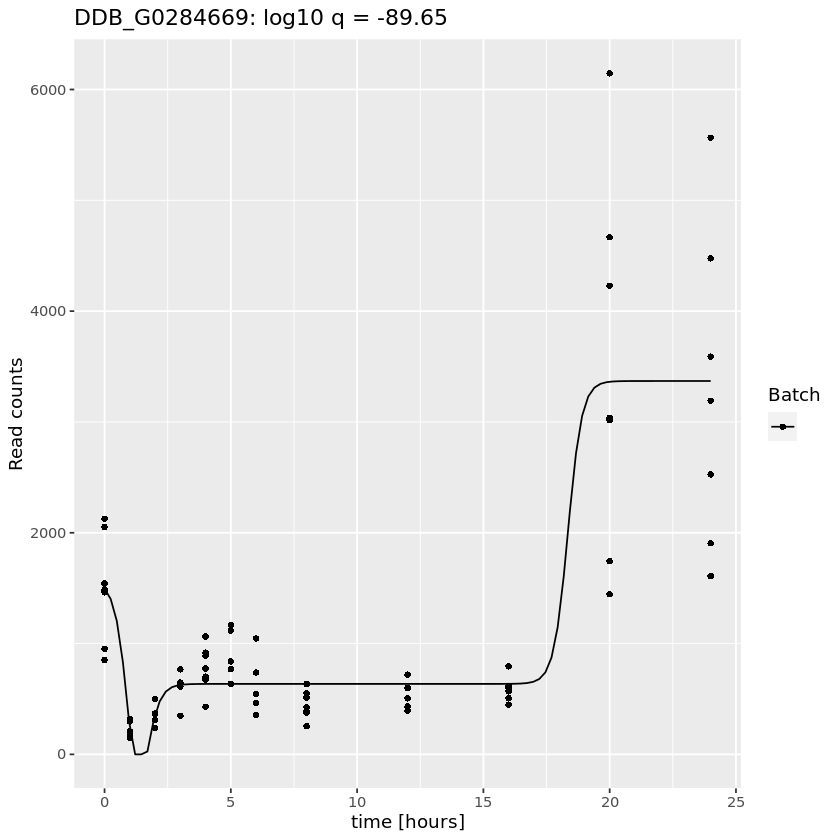

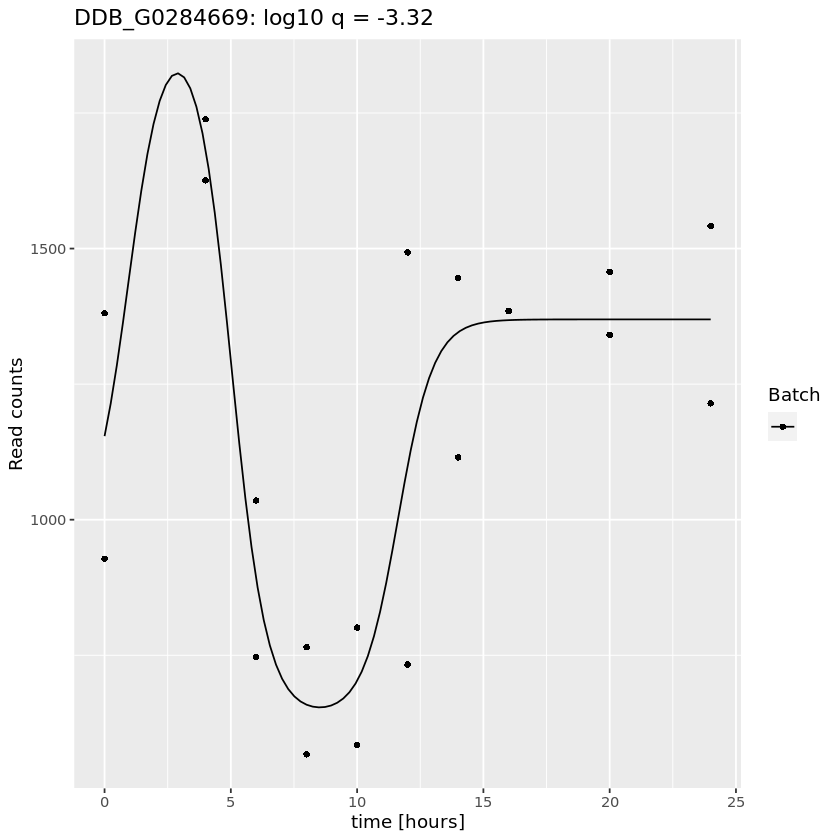

In [37]:
idx=27
#gene=vecPlotGenesSub[idx]
gene='DDB_G0284669'
print(fits_ref[gene,])
print(fits_case[gene,])

#findTransitions(impulse_ref,fits_ref[gene,'bestFit'],gene)
#findTransitions(impulse_case,fits_case[gene,'bestFit'],gene)
#filterTransitions[gene,]
filterFits[gene,]
#filterNLargeDiff[gene,]

plotGenesExtended(
vecGeneIDs = c(gene),
scaNTopIDs = NULL,
objectImpulseDE2 = impulse_ref,
boolCaseCtrl = FALSE,
dirOut = NULL,
strFileName = NULL,
vecRefPval = NULL,
strNameRefMethod = NULL,model=MODELS[fits_ref[gene,'bestFit']])[[1]]
plotGenesExtended(
vecGeneIDs =c(gene),
scaNTopIDs = NULL,
objectImpulseDE2 = impulse_case,
boolCaseCtrl = FALSE,
dirOut = NULL,
strFileName = NULL,
vecRefPval = NULL,
strNameRefMethod = NULL,model=MODELS[fits_case[gene,'bestFit']])[[1]]

In [70]:
unlist(result_ref[gene,])
unlist(result_case[gene,])

Gene               impulseTOconst_p 
                "DDB_G0269322"         "3.00654556098149e-31" 
           impulseTOconst_padj                    loglik_full 
        "9.45122021473208e-31"            "-542.165487514474" 
                    loglik_red                        df_full 
           "-618.686027294565"                            "7" 
                        df_red                           mean 
                           "2"             "170.216596625043" 
              converge_impulse                 converge_const 
                           "0"                            "0" 
              converge_sigmoid             impulseTOsigmoid_p 
                           "0"            "0.639139913120082" 
         impulseTOsigmoid_padj               sigmoidTOconst_p 
                           "1"         "9.07512862540067e-33" 
           sigmoidTOconst_padj                    isTransient 
        "3.01552094840796e-32"                        "FALSE" 
                  isMonotonous          converge_threeSigmoid 
                        "TRUE"                            "0" 
          converge_fourSigmoid          threeSigmoidTOconst_p 
                           "0"         "3.23517145254521e-30" 
      threeSigmoidTOconst_padj        threeSigmoidTOsigmoid_p 
        "9.00960600008701e-30"             "0.54410738927631" 
    threeSigmoidTOsigmoid_padj        threeSigmoidTOimpulse_p 
           "0.630555402911867"            "0.334994087610516" 
    threeSigmoidTOimpulse_padj           fourSigmoidTOconst_p 
           "0.407435940529541"         "6.94343356411472e-29" 
       fourSigmoidTOconst_padj         fourSigmoidTOsigmoid_p 
        "1.90362592564664e-28"            "0.786116529976306" 
     fourSigmoidTOsigmoid_padj         fourSigmoidTOimpulse_p 
           "0.890579339216682"            "0.683799781404648" 
     fourSigmoidTOimpulse_padj    fourSigmoidTOthreeSigmoid_p 
           "0.791380350461845"            "0.953096714049776" 
fourSigmoidTOthreeSigmoid_padj                NMinMax_impulse 
                           "1"                            "2" 
          NMinMax_threeSigmoid            NMinMax_fourSigmoid 
                           "2"                            "4" 
                       allZero 
                       "FALSE"

Gene               impulseTOconst_p 
                "DDB_G0269322"         "1.86112860050339e-33" 
           impulseTOconst_padj                    loglik_full 
         "8.7102272510278e-32"            "-109.251018785028" 
                    loglik_red                        df_full 
           "-190.953387887043"                            "7" 
                        df_red                           mean 
                           "2"             "213.265111471602" 
              converge_impulse                 converge_const 
                           "0"                            "0" 
              converge_sigmoid             impulseTOsigmoid_p 
                           "0"           "0.0258303859081216" 
         impulseTOsigmoid_padj               sigmoidTOconst_p 
           "0.201087624148931"         "1.27752064276678e-33" 
           sigmoidTOconst_padj                    isTransient 
        "6.19675093967159e-32"                        "FALSE" 
                  isMonotonous          converge_threeSigmoid 
                        "TRUE"                            "0" 
          converge_fourSigmoid          threeSigmoidTOconst_p 
                           "0"         "1.87017854964342e-36" 
      threeSigmoidTOconst_padj        threeSigmoidTOsigmoid_p 
        "8.58490774071946e-35"         "8.88954841457977e-06" 
    threeSigmoidTOsigmoid_padj        threeSigmoidTOimpulse_p 
        "6.63173596233376e-05"         "2.24019065074414e-05" 
    threeSigmoidTOimpulse_padj           fourSigmoidTOconst_p 
         "0.00015363322373535"         "3.52514082199714e-35" 
       fourSigmoidTOconst_padj         fourSigmoidTOsigmoid_p 
        "1.55847646451467e-33"         "5.00321241337155e-05" 
     fourSigmoidTOsigmoid_padj         fourSigmoidTOimpulse_p 
        "0.000336006098232088"         "0.000188319167863103" 
     fourSigmoidTOimpulse_padj    fourSigmoidTOthreeSigmoid_p 
         "0.00113837131693634"            "0.696589629873671" 
fourSigmoidTOthreeSigmoid_padj                NMinMax_impulse 
                           "1"                            "2" 
          NMinMax_threeSigmoid            NMinMax_fourSigmoid 
                           "4"                            "4" 
                       allZero 
                       "FALSE"

In [ ]:
impulse_ref@lsModelFits$case[[gene]][[unlist(modelExtraction[[1]][1])]][[unlist(modelExtraction[[1]][2])]]
impulse_case@lsModelFits$case[[gene]][[unlist(modelExtraction[[3]][1])]][[unlist(modelExtraction[[3]][2])]]

In [181]:
impulse_ref@lsModelFits$case[['DDB_G0267824']]$lsFourSigmoidFit$scaLL

[1] -410.1275

In [1709]:
# Try to implement a simpler gene selection based on the sum of differences between neighbouring samples
absDiff<-function(vec){
    diff=abs(head(vec,length(vec)-1)-tail(vec,length(vec)-1))
    return(diff)
}

# Example gene expression profiles
examples=list('rising'=c(0,0,3,3,3,3), 'noisy'=c(0,3,0,3,0,3),
              'peak'=c(0,0,3,3,3,0,0),'small narrow peak'=c(0,0,1,1,0,0),
              'narrow peak'=c(0,0,3,3,0,0))
for (example_name in names(examples)){
    example=examples[[example_name]]
    # Calculate absolute differences between the time points and normalise by standard deviation (biased)
    exampleSd<-sd(example)*sqrt((length(example)-1)/length(example))
    normDiff<-rollapply(example, 2, absDiff)/exampleSd
    # Sum of normalised differences
    print(paste(example_name,': sum of normalised differences',round(sum(normDiff),2),
                '; normalised differences',paste(round(normDiff,2),collapse=', ')))
}

[1] "rising : sum of normalised differences 2.12 ; normalised differences 0, 2.12, 0, 0, 0"
[1] "noisy : sum of normalised differences 10 ; normalised differences 2, 2, 2, 2, 2"
[1] "peak : sum of normalised differences 4.04 ; normalised differences 0, 2.02, 0, 0, 2.02, 0"
[1] "small narrow peak : sum of normalised differences 4.24 ; normalised differences 0, 2.12, 0, 2.12, 0"
[1] "narrow peak : sum of normalised differences 4.24 ; normalised differences 0, 2.12, 0, 2.12, 0"


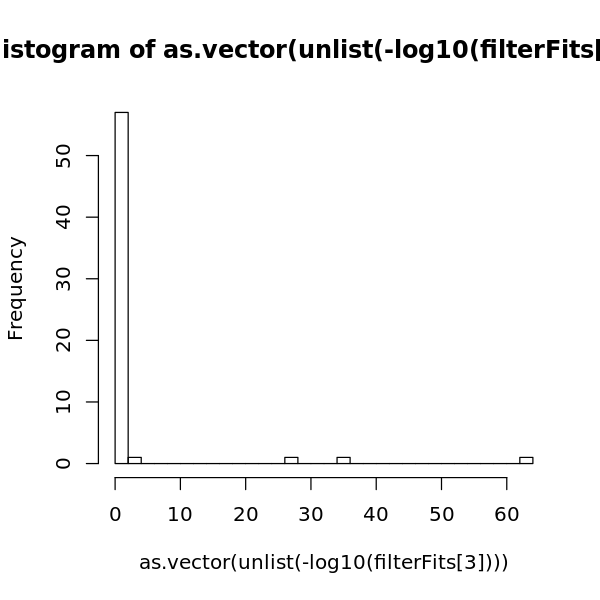

In [1344]:
hist(as.vector(unlist(-log10(filterFits[3]))),breaks =40)

In [ ]:
library(ComplexHeatmap)
library(circlize)
library(viridis)
library(proxy)
library(seriation)
library(dendextend)
library(dplyr)

In [30]:
path_expression='/home/khrovatin/timeTrajectoriesNet/data/regulons/'
path_strain_order='/home/khrovatin/timeTrajectoriesNet/data/'
path_phenotypes = '/home/khrovatin/timeTrajectoriesNet/data/stages/'

In [31]:
#**! Specify file names for regulons and expression
#** Expression tab file: Genes in columns (already scaled), averaged strain data in rows, 
#** three additional comlumns: Time, Strain, and Group (meaning strain group)
avg_expression=read.table(paste(path_expression,"genes_averaged_orange_scale99percentileMax0.1.tsv",sep=''),
                          header=TRUE,row.names=1, sep="\t")

#**! Specify file names for phenotipic data
#** Phenotypes tab file: Short averaged sample names in rows (as in avg_expression) and columns with phenotypes.
#** Phenotypes should have values: yes, no, no data
avg_phenotype=read.table(paste(path_phenotypes,"averageStages.tsv",sep=''),
                          header=TRUE,row.names=1, sep="\t", stringsAsFactors=FALSE)
#Change avg_phenotypes data so that each phenotype can be coloured differently
avg_phenotype[avg_phenotype=='no']=NA
for(col in colnames(avg_phenotype)){
  new_col=avg_phenotype[col]
  new_col[new_col=='yes']=col
  avg_phenotype[col]=new_col
}


#** Strain order - single column with ordered strain names
strain_order<-as.vector(read.table(paste(path_strain_order,"strain_order.tsv",sep=''))[,1])

In [32]:
#** Some plotting parameters
legend_font=12
phenotypes_font=10
legened_height=1.5
legend_width=0.7
top_annotation_height=0.6
phenotype_annotation_height=3
cluster_font=20

In [33]:
make_anno<-function(){



#Strain groups annotation
#** Colours of strain groups
group_cols=c('agg-'= '#ed1c24', 'lag_dis'= '#f97402','tag_dis'='#ffb100', 'tag'='#d9d800', 'cud'= '#008629', 'WT'= '#00b2ff',
                        'sFB'= '#1925ae', 'prec'='#a400d4' )
#group_cols_background=c('agg-'= '#cccccc', 'lag_dis'= '#666666','tag_dis'='#666666', 'tag'='#666666', 'cud'= '#cccccc', 
#                        'WT'= '#cccccc','sFB'= '#cccccc', 'prec'='#cccccc' )
group_cols_background=c('agg-'= 'white', 'lag_dis'= 'white','tag_dis'='#666666', 'tag'='#666666', 'cud'= 'white', 
                        'WT'= 'white','sFB'= 'white', 'prec'='white' )
group_cols_text=c('agg-'= 'black', 'lag_dis'= 'black','tag_dis'='black', 'tag'='black', 'cud'= '#eeeeee', 
                        'WT'= 'black','sFB'= '#eeeeee', 'prec'='#eeeeee' )

group_data=t(avg_expression['Group'])
rownames(group_data)<-c('Phenotypic group')            
# ht_list=Heatmap(group_data,show_column_names = FALSE, 
#                 height = unit(top_annotation_height, "cm"),
#                 column_split=factor(avg_expression$Strain,
#                                     #** Ordering of the strains in the heatmap (a vector of strain names)
#                                     #levels=unique(avg_expression$Strain)
#                                     levels=strain_order
#                 ),
#                 cluster_columns=FALSE,name='\nPhenotypic \ngroup\n',
#                 #** Strain name font size
#                 column_title_gp=gpar(fontsize=legend_font),
#                 col=group_cols, heatmap_legend_param = list( 
#                 grid_width= unit(legend_width, "cm"),grid_height= unit(legened_height, "cm") ,
#                 labels_gp = gpar(fontsize = cluster_font),title_gp = gpar(fontsize = cluster_font)),
#                 row_names_gp = gpar(fontsize = cluster_font))

#Time annotation
times=unique(avg_expression$Time)
#** Time colours, group colours, and gaps
group_cols_ordered=c()
groups_ordered=c()
background_cols_ordered=c()
text_cols_ordered=c()
gaps=c()
previous_group=NULL
for(strain in strain_order){
  group=as.character(avg_expression[avg_expression$Strain==strain,'Group'][1])
  #print(paste(strain,group,group_cols[group]))
  groups_ordered<-append(groups_ordered,group)
  group_cols_ordered<-append(group_cols_ordered,group_cols[group])
  background_cols_ordered<-append(background_cols_ordered,group_cols_background[group])
  text_cols_ordered<-append(text_cols_ordered,group_cols_text[group])
  #Gaps - if previous group was different add larger gap; (N gaps = N-1 columns)
  if (!is.null(previous_group)){
    if (previous_group==group){ 
      gaps=append(gaps,1)
    }else{
      gaps=append(gaps,2.5)
    }
  }
  previous_group=group
}
gaps=unit(gaps,'mm')

col_time = colorRamp2( c(min(times),max(times)),c( "white", "#440154FF"))

ht_list=Heatmap(t(avg_expression['Time']), height = unit(top_annotation_height, "cm"),
                column_split=factor(avg_expression$Strain,
                #** Ordering of the strains in the heatmap (a vector of strain names)
                levels=strain_order ),
                column_title =NULL,column_gap=gaps,
                cluster_columns=FALSE, show_column_names = FALSE,name='\nTime\n',col=col_time,
                heatmap_legend_param = 
                list( at = c(min(times),as.integer(mean(c(min(times),max(times)))),max(times)),
                grid_width= unit(legend_width, "cm"),grid_height= unit(legened_height, "cm") ,
                labels_gp = gpar(fontsize = cluster_font),title_gp = gpar(fontsize = cluster_font)
                    ),
                row_names_gp = gpar(fontsize = cluster_font),
                #column_title_gp=gpar(border =group_cols_ordered,fontsize=cluster_font,col =text_cols_ordered,fill=group_cols_ordered,
                #                     fontface='bold'),
                #Annotation for Phenotype group
                top_annotation = HeatmapAnnotation(
                  Phenotype=anno_block(gp = 
                                         # Background colour; fill: color, col: border                               
                                         #gpar(fill = '#949494',col='transparent'),
                                         #gpar(fill = 'white',col='transparent'),
                                         #gpar(fill = background_cols_ordered,col='transparent'),
                                         #gpar(fill = group_cols_ordered,col=group_cols_ordered),
                                         gpar(fill=group_cols_ordered,col=group_cols_ordered,lwd =2,linejoin='mitre'),
                                       labels = groups_ordered , labels_gp = gpar(col = 
                                                                                    # Text colour
                                                                                    # 'black',
                                                                                    #group_cols_ordered, 
                                                                                    text_cols_ordered,
                                                                                  fontsize = cluster_font
                                                                                  #,fontface='bold'
                                       ),
                                       #show_name = TRUE
                                      ) ,
                  Strain = anno_block(gp = 
                                            # Background colour; fill: color, col: border                               
                                            #gpar(fill = '#949494',col='transparent'),
                                            #gpar(fill = 'white',col='transparent'),
                                            #gpar(fill = background_cols_ordered,col='transparent'),
                                            #gpar(fill = group_cols_ordered,col=group_cols_ordered),
                                              gpar(fill='white',col=group_cols_ordered,lwd =2,linejoin='mitre'),
                        labels = strain_order , labels_gp = gpar(col = 
                                                                    # Text colour
                                                                   'black',
                                                                    #group_cols_ordered, 
                                                                    #text_cols_ordered,
                                                                    fontsize = cluster_font
                                                                  #,fontface='bold'
                                                                  ), 
                                      #show_name = TRUE
                                     ),
                annotation_name_gp=gpar(fontsize = cluster_font)
                        )
                )
#ht_list=ht_list %v% ht_time

#Phenotype annotation
#** Colours of phenotype annotations
phenotype_cols=c('no image'= '#d9d9d9', 'no_agg'= '#ed1c24', 'stream'= '#985006', 'lag'= '#f97402', 'tag'= '#d9d800', 'tip'= '#66cf00',
  'slug'= '#008629', 'mhat'= '#00c58f', 'cul'= '#0ff2ff', 'FB'= '#00b2ff', 'yem'='#666666')
#phenotype_cols=c('no data'= '#d9d9d9', 'yes'= '#74cf19', 'no'='#b54c4c')
ht_phenotype=Heatmap(t(avg_phenotype)[,rownames(avg_expression)], height = unit(phenotype_annotation_height, "cm"),
                cluster_columns=FALSE,cluster_rows=FALSE, show_column_names = FALSE,name='\nMorphological \nstage\n',col=phenotype_cols,
                row_names_gp = gpar(fontsize = phenotypes_font), na_col = "white",
                row_title ='Morphological stage',row_title_side ='right',row_title_gp=gpar(fontsize = cluster_font),
                heatmap_legend_param = list( grid_width= unit(legend_width, "cm"),grid_height= unit(legened_height, "cm") ,
                                             labels_gp = gpar(fontsize = cluster_font),title_gp = gpar(fontsize = cluster_font)))
ht_list=ht_list %v% ht_phenotype
    
return(ht_list)
}

In [34]:
stage_order<-colnames(avg_phenotype)
expressions<-within(avg_expression, rm('Time', 'Strain','Group'))
min_expression<-min(expressions)
max_expression<-max(expressions)

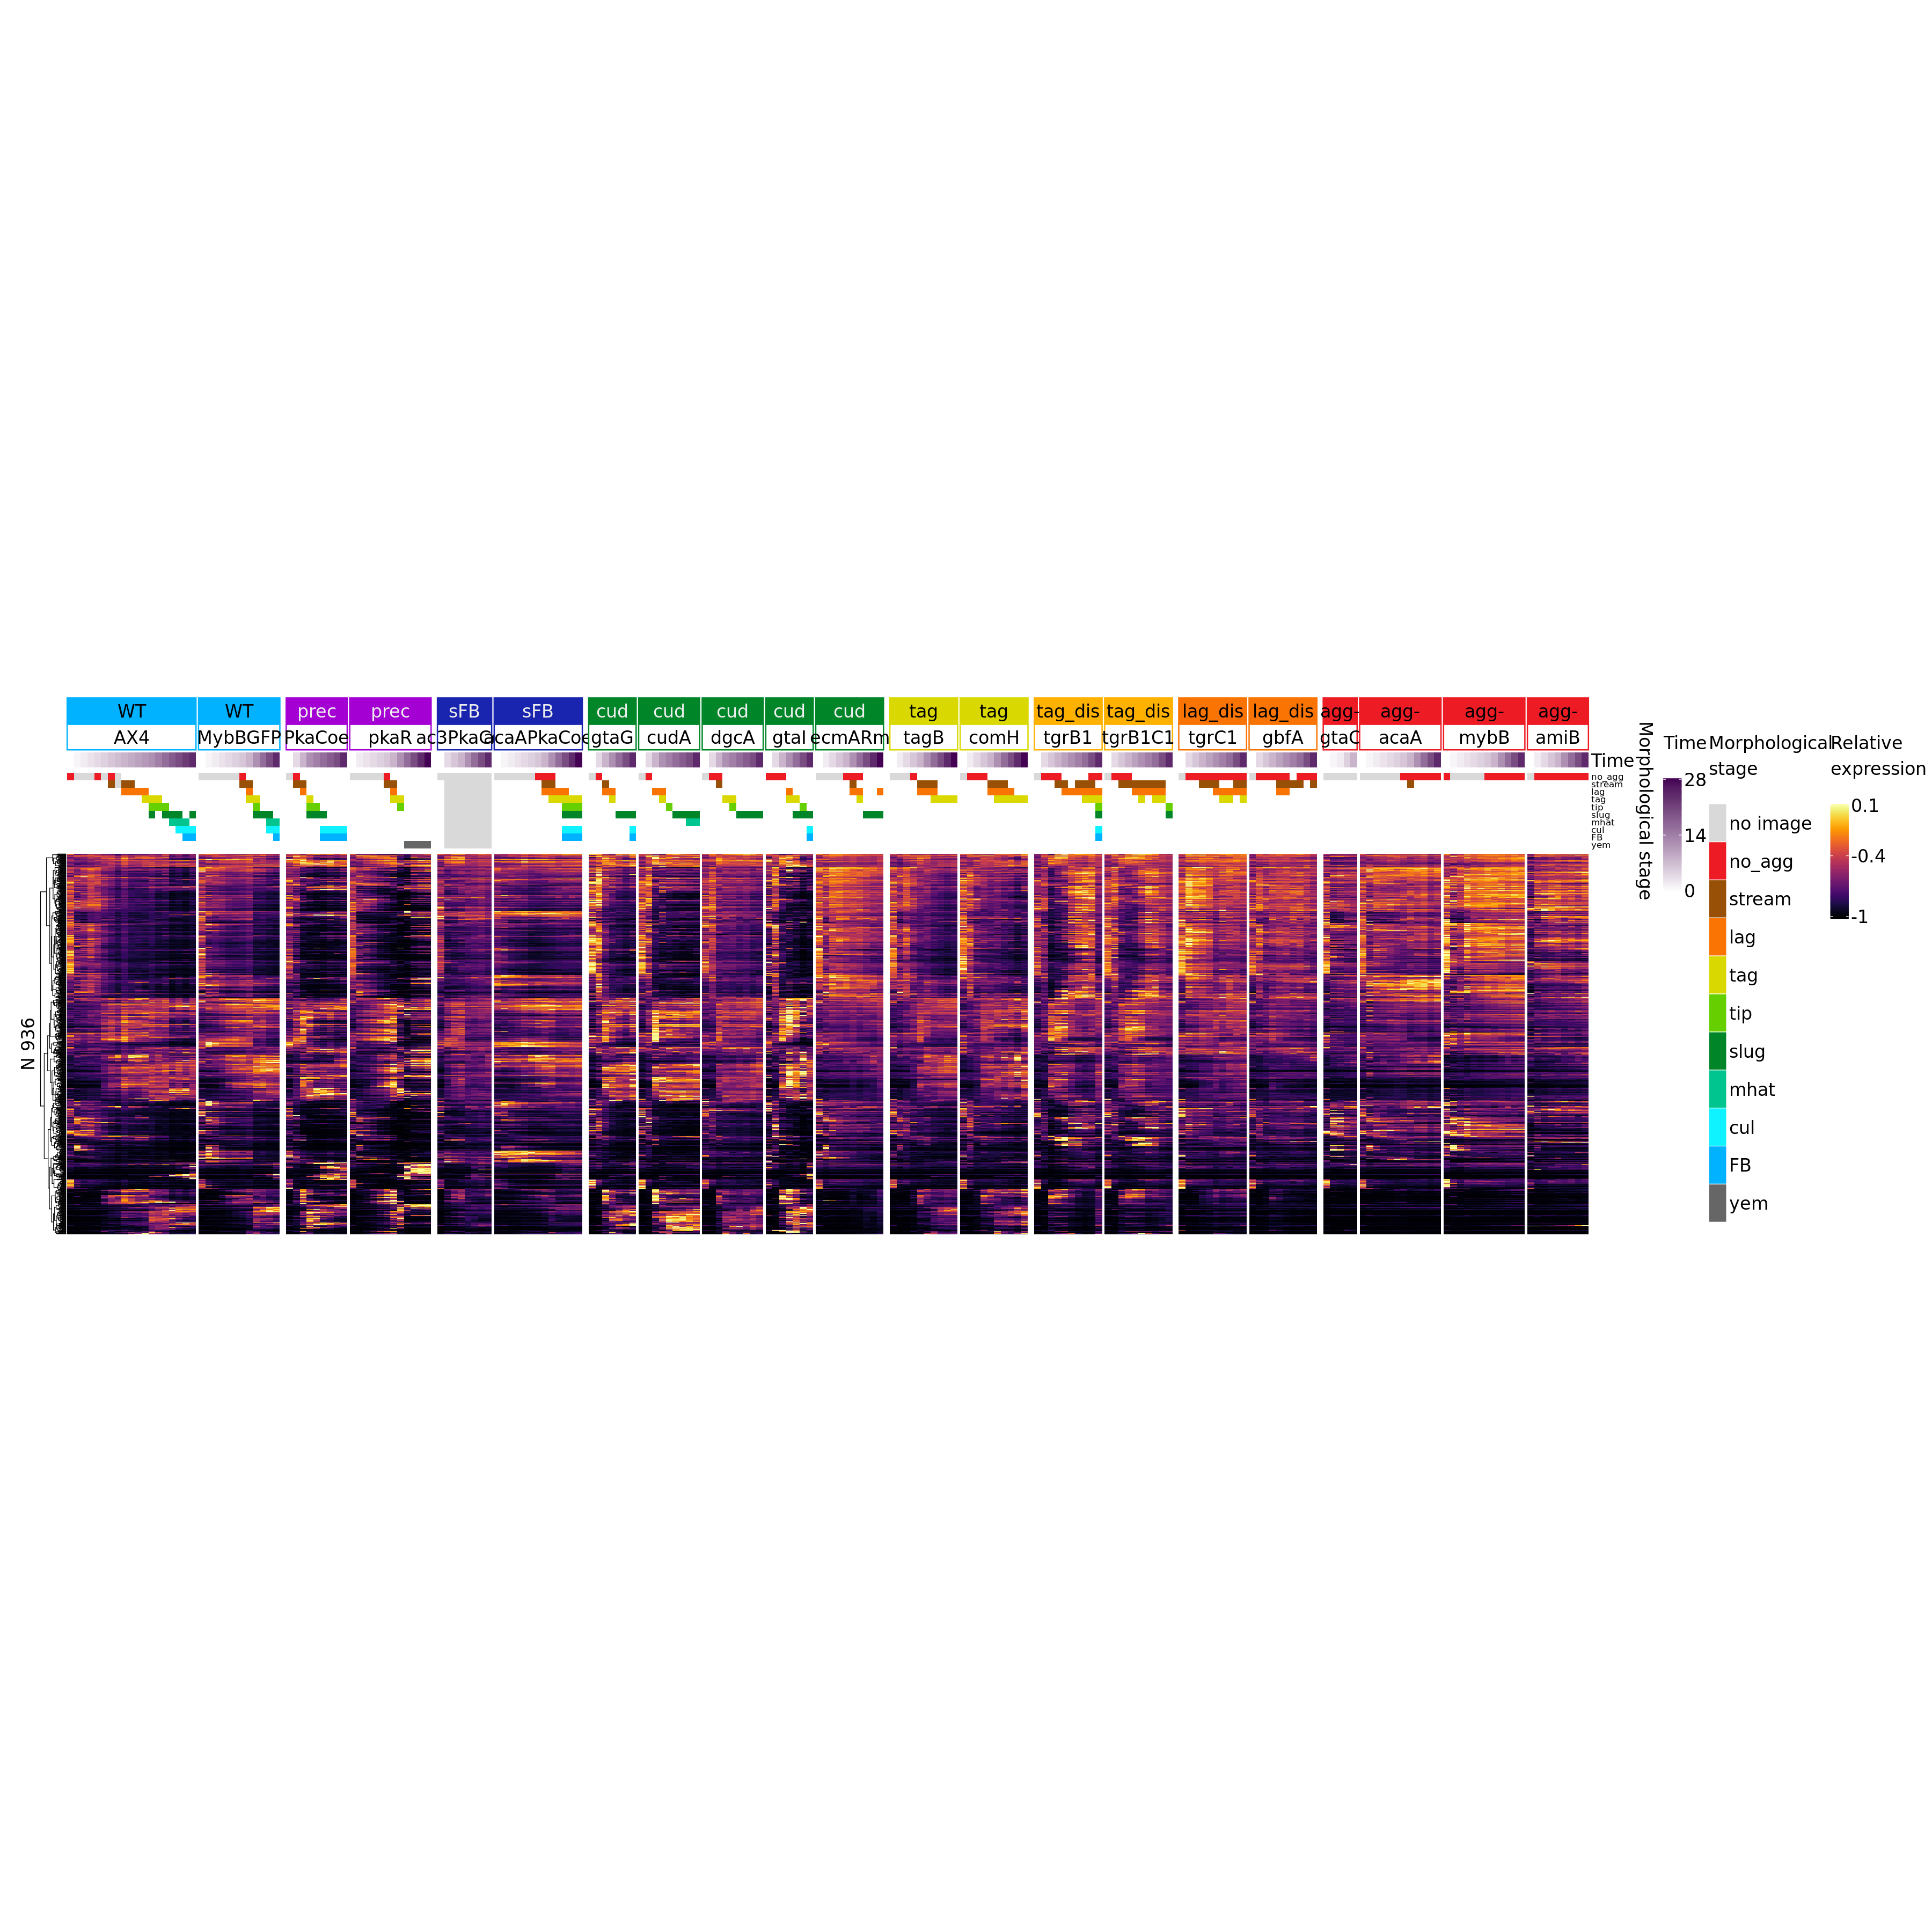

In [41]:
options(repr.plot.width=30, repr.plot.height=30)
vecGenes<-vecPlotGenes[
    filterNLargeDiff[,'nLargeDiffRef']<filterNLargeDiff[,'nLargeDiffCase'] 
    & filterTransitions[,'hasComplexShape']]
    
    expression=t(avg_expression[avg_expression$Strain=='AX4',vecGenes])
    #expression=t(avg_expression[,genes])
    distances<-dist(expression, method="cosine")
    hc<-hclust(d=distances, method = "ward.D2" )
    hc_ordered<-reorder(x=hc,dist = distances)
    vecGenes<- as.dendrogram(hc_ordered) %>% labels
    
    n_genes=length(vecGenes)
    #print(paste(comparison,n_genes))

    data_anno=paste('N',n_genes)
    height=0.3*n_genes
    if (height>15) height=15
    heatmap=Heatmap(t(avg_expression[,vecGenes]),
                    cluster_columns = FALSE,cluster_rows = TRUE,
                    show_column_names = FALSE,
                      show_row_names = FALSE, col=inferno(256),column_title=NULL, 
                      row_title=data_anno,
                      show_heatmap_legend = TRUE,heatmap_legend_param = list(
                      title = "\nRelative \nexpression\n",
                      at = c(min_expression, round(mean(c(min_expression,max_expression)),1),max_expression),
                      grid_width= unit(legend_width, "cm"),grid_height= unit(legened_height, "cm") ,
                      labels_gp = gpar(fontsize = cluster_font),title_gp = gpar(fontsize = cluster_font)),
                      #** Cluster name fontsize
                      row_title_gp=gpar(fontsize=cluster_font),height=unit(height, "cm"))

    draw(make_anno() %v% heatmap,width=unit(60, "cm"),column_title_gp = gpar(fontsize = cluster_font))
options(repr.plot.width=5, repr.plot.height=5)

In [ ]:
write.table(data.frame(Gene=vecPlotGenes[
    filterNLargeDiff[,'nLargeDiffRef']<filterNLargeDiff[,'nLargeDiffCase'] 
    & filterTransitions[,'hasComplexShape']]),file=paste(pathSave,'try4.tsv',sep=''),sep='\t',row.names = FALSE)

In [1959]:
paste(pathSave,'try4.tsv',sep='')

[1] "/home/khrovatin/timeTrajectoriesNet/data/stages/disagg/impulse/try4.tsv"

# NOT IMPLEMENTED Gene selection based on N large differences
No models are fitted for this.
REASON: Problems with noisy local min/max for deterining large differences between more prominent min/max.

In [1738]:
genesNorm<-read.table(paste(pathConditions,'mergedGenes_RPKUM.tsv',sep=''), header=TRUE,row.names=1, sep="\t")

In [1768]:
geneData<-merge(t(genesNorm), conditions[c('Time','Strain')], by='row.names')
rownames(geneData)<-geneData$Row.names
geneData<-subset(geneData, select = -c(Row.names))
geneData<-aggregate(. ~ Strain+Time, data = geneData, median)

In [1773]:
agg<-aggregate(. ~ Strain+Time, data = geneData, median)

In [ ]:
for (gene in rownames(genesNorm)){
    dataRef<-agg[agg$Strain=='AX4',gene]
    if(any(dataRef>0)){
        rangeRef<-max(dataRef)-min(dataRef)

    }
}